# **Improving racial disparity in US voter participation**

**Team 6: Carmen Cheung, Yifang He, Ying Li, Xi Wang, Yuchen Wu**

# **1. Introduction**

### 1.1 Problem Statement
The United States voter participation is low compared to voter turnout globally, ranking 26th out of 32 countries in the OECD, an organization of economically developed countries with a democracy. Voter participation has hovered around 60% during presidential elections of the population who are of age to vote in the past few decades, which marks a declining trend in the last two centuries.  

Voter participation is crucial for the elected officials of the nation to be able to reflect the interests of the people. One pressing issue in the United States is the wealth disparity. The United States has one of the highest levels of income inequality among other developed countries such as the UK, Japan, Canada, etc. In fact, it has been increasing and getting worse from year to year. What this means for our democracy is that as the rich get richer, there is the threat of individual interests being reflected in policies that affect the population due to the flow of money. This graph shows how income inequality, as measured by the Gini coefficient has worsened dramatically in the last two decades. 


Previous studies indicate that voter participation increases with family income. For example, during the 2016 presidential election, only 48% of families in the lowest income category voted, while 86% of families in the highest income category. The ratio of differences across income groups is qualitatively similar in other election years as well. Lower-income population faces barriers to voting such as transportation, getting time off work, education, etc. If the population in the lower-income brackets is less likely to vote, the probability of their interests getting reflected in the elected officials and future policies is lower and it becomes a perpetually, worsening cycle of disenfranchisement. How this translates to racial inequality is that there is a high correlation between race and income. For example, in 2019, the median Black household only earned 61 cents for every dollar of income of a median white household compared to 74 cents for the median Hispanic household. 


Our goal is to investigate factors that affect voter participation to isolate some of the causes of voter disparity with an emphasis on variables that relate to employment and income. We will examine the correlational relationship between these factors and racial population by county to eventually determine if there is a causal impact that contributes to the racial gap in voter participation. 

We first explore Hawaii (HI) state dataset. Since Hawaii is a relatively small dataset with less significant in voting power, we would dive deeper into swing states such as Pennsylvania (PA) and Georgia (GA).

### 1.2 Data Structure

**The main columns for the voter dataset are outlined below:**

**Column**|**Description**
---------|----------
LALVOTERID| Permanent and unique ID for a single voter
Mailing_Families_FamilyID| Unique alpha-numeric ID of a mailing household address
Voters_Gender| Voters' gender
Voters_OfficialRegDate| Voters' official registration date
CommercialData_EstimatedHHIncomeAmount| Estimate household income
CommercialData_EstimatedAreaMedianHHIncome| Estimate area median household income
Residence_Addresses_Zip| Zip code of the residence address
Residence_Addresses_Latitude| Latitude of the residence address
Residence_Addresses_Longitude| Longitude of the residence address
Ethnic_Description| Ethnic description for a single voter
EthnicGroups_EthnicGroup1Desc| Ethnic group for a single voter
Parties_Description| Party description for a single voter
Voters_VotingPerformanceEvenYearGeneral| Voting performance in even year general election
Voters_VotingPerformanceEvenYearPrimary| Voting performance in even year primary election
General_2020| General election 2020, Y - voted, null - did't vote
Primary_2020| Primary election 2020, Y - voted, null - did't vote
PRI_BLT_2020| Primary election 2020 ballot results, D - voted for Democratic, R - Republican, O - Other
General_2018| General election 2018, Y - voted, null - did't vote
Primary_2018| Primary election 2018, Y - voted, null - did't vote
PRI_BLT_2018| Primary election 2018 ballot results, D - voted for Democratic, R - Republican, O - Other
General_2016| General election 2016, Y - voted, null - did't vote
Primary_2016| Primary election 2016, Y - voted, null - did't vote
PRI_BLT_2016| Primary election 2016 ballot results, D - voted for Democratic, R - Republican, O - Other

**Source:**

**BU Center for Antiracist Research Voter Datasets**

The Hawaii State: "VM2Uniform--HI--2021-04-01.tab"

The Pennsylvania State: "VM2Uniform--PA--2021-05-20.tab"

The Georgia State: "VM2Uniform--GA--2021-04-16.tab"

**Additional Data Sources:**

**Bureau of Economic Analysis - GDP and Income by County**
https://console.cloud.google.com/marketplace/product/bureau-econonmic-analysis/gdp-income-by-county?project=is841-hm-xi

**United States Census Bureau - American Community Survey**
https://console.cloud.google.com/marketplace/product/united-states-census-bureau/acs?project=is841-hm-xi

**U.S. Bureau of Labor Statistics - Unemployment Rates by County**
https://www.kaggle.com/datasets/jayrav13/unemployment-by-county-us

**kepler.gl - open source geospatial analysis tool for large-scale datasets**
https://kepler.gl/demo

### 1.3 Introduction & Motivation

### 1.4 Environment Setup

In [1]:
from pyspark.sql.types import StructField, StructType, BooleanType, DoubleType, IntegerType, StringType, LongType
import pyspark.sql.functions as F
from pyspark.sql.functions import desc, col, year, to_date, isnan, when, count
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
%matplotlib inline
plt.style.use('ggplot')

In [2]:
VoterSchema = StructType([ 
 StructField('SEQUENCE',IntegerType(), True),
 StructField('LALVOTERID',StringType(), True),
 StructField('Voters_Active',StringType(), True),
 StructField('Voters_StateVoterID',IntegerType(), True),
 StructField('Voters_CountyVoterID',StringType(), True),
 StructField('VoterTelephones_LandlineAreaCode',IntegerType(), True),
 StructField('VoterTelephones_Landline7Digit',StringType(), True),
 StructField('VoterTelephones_LandlineFormatted',StringType(), True),
 StructField('VoterTelephones_LandlineUnformatted',LongType(), True),
 StructField('VoterTelephones_LandlineConfidenceCode',IntegerType(), True),
 StructField('VoterTelephones_CellPhoneOnly',BooleanType(), True),
 StructField('VoterTelephones_CellPhoneFormatted',StringType(), True),
 StructField('VoterTelephones_CellPhoneUnformatted',LongType(), True),
 StructField('VoterTelephones_CellConfidenceCode',IntegerType(), True),
 StructField('Voters_FirstName',StringType(), True),
 StructField('Voters_MiddleName',StringType(), True),
 StructField('Voters_LastName',StringType(), True),
 StructField('Voters_NameSuffix',StringType(), True),
 StructField('Residence_Addresses_AddressLine',StringType(), True),
 StructField('Residence_Addresses_ExtraAddressLine',StringType(), True),
 StructField('Residence_Addresses_City',StringType(), True),
 StructField('Residence_Addresses_State',StringType(), True),
 StructField('Residence_Addresses_Zip',IntegerType(), True),
 StructField('Residence_Addresses_ZipPlus4',IntegerType(), True),
 StructField('Residence_Addresses_HouseNumber',StringType(), True),
 StructField('Residence_Addresses_PrefixDirection',StringType(), True),
 StructField('Residence_Addresses_StreetName',StringType(), True),
 StructField('Residence_Addresses_Designator',StringType(), True),
 StructField('Residence_Addresses_SuffixDirection',StringType(), True),
 StructField('Residence_Addresses_ApartmentNum',StringType(), True),
 StructField('Residence_Addresses_ApartmentType',StringType(), True),
 StructField('Residence_Addresses_CassErrStatCode',StringType(), True),
 StructField('Voters_SequenceZigZag',IntegerType(), True),
 StructField('Voters_SequenceOddEven',IntegerType(), True),
 StructField('Residence_Addresses_CensusTract',IntegerType(), True),
 StructField('Residence_Addresses_CensusBlockGroup',IntegerType(), True),
 StructField('Residence_Addresses_CensusBlock',IntegerType(), True),
 StructField('Residence_Addresses_Latitude',DoubleType(), True),
 StructField('Residence_Addresses_Longitude',DoubleType(), True),
 StructField('Residence_Addresses_LatLongAccuracy',StringType(), True),
 StructField('Residence_Addresses_Property_LandSq_Footage',IntegerType(), True),
 StructField('Residence_Addresses_Property_HomeSq_Footage',IntegerType(), True),
 StructField('Residence_Addresses_Density',IntegerType(), True),
 StructField('Residence_Families_FamilyID',StringType(), True),
 StructField('Residence_Families_HHCount',IntegerType(), True),
 StructField('Residence_HHGender_Description',StringType(), True),
 StructField('Residence_HHParties_Description',StringType(), True),
 StructField('Mailing_Addresses_AddressLine',StringType(), True),
 StructField('Mailing_Addresses_ExtraAddressLine',StringType(), True),
 StructField('Mailing_Addresses_City',StringType(), True),
 StructField('Mailing_Addresses_State',StringType(), True),
 StructField('Mailing_Addresses_Zip',IntegerType(), True),
 StructField('Mailing_Addresses_ZipPlus4',IntegerType(), True),
 StructField('Mailing_Addresses_HouseNumber',StringType(), True),
 StructField('Mailing_Addresses_PrefixDirection',StringType(), True),
 StructField('Mailing_Addresses_StreetName',StringType(), True),
 StructField('Mailing_Addresses_Designator',StringType(), True),
 StructField('Mailing_Addresses_SuffixDirection',StringType(), True),
 StructField('Mailing_Addresses_ApartmentNum',StringType(), True),
 StructField('Mailing_Addresses_ApartmentType',StringType(), True),
 StructField('Mailing_Addresses_CassErrStatCode',StringType(), True),
 StructField('Mailing_Families_FamilyID',StringType(), True),
 StructField('Mailing_Families_HHCount',IntegerType(), True),
 StructField('Mailing_HHGender_Description',StringType(), True),
 StructField('Mailing_HHParties_Description',StringType(), True),
 StructField('Voters_Gender',StringType(), True),
 StructField('Voters_Age',IntegerType(), True),
 StructField('Voters_BirthDate',StringType(), True),
 StructField('DateConfidence_Description',StringType(), True),
 StructField('Parties_Description',StringType(), True),
 StructField('VoterParties_Change_Changed_Party',StringType(), True),
 StructField('Ethnic_Description',StringType(), True),
 StructField('EthnicGroups_EthnicGroup1Desc',StringType(), True),
 StructField('CountyEthnic_LALEthnicCode',StringType(), True),
 StructField('CountyEthnic_Description',StringType(), True),
 StructField('Religions_Description',StringType(), True),
 StructField('Voters_CalculatedRegDate',StringType(), True),
 StructField('Voters_OfficialRegDate',StringType(), True),
 StructField('Voters_PlaceOfBirth',StringType(), True),
 StructField('Languages_Description',StringType(), True),
 StructField('AbsenteeTypes_Description',StringType(), True),
 StructField('MilitaryStatus_Description',StringType(), True),
 StructField('MaritalStatus_Description',StringType(), True),
 StructField('US_Congressional_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_CD',StringType(), True),
 StructField('State_Senate_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_SD',StringType(), True),
 StructField('State_House_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_HD',StringType(), True),
 StructField('State_Legislative_District',StringType(), True),
 StructField('AddressDistricts_Change_Changed_LD',StringType(), True),
 StructField('2001_US_Congressional_District',StringType(), True),
 StructField('2001_State_Senate_District',IntegerType(), True),
 StructField('2001_State_House_District',IntegerType(), True),
 StructField('2001_State_Legislative_District',StringType(), True),
 StructField('County',StringType(), True),
 StructField('Voters_FIPS',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_County',StringType(), True),
 StructField('Precinct',StringType(), True),
 StructField('County_Commissioner_District',StringType(), True),
 StructField('County_Supervisorial_District',StringType(), True),
 StructField('County_Legislative_District',StringType(), True),
 StructField('City',StringType(), True),
 StructField('City_Council_Commissioner_District',StringType(), True),
 StructField('City_Ward',StringType(), True),
 StructField('City_Mayoral_District',StringType(), True),
 StructField('Town_District',StringType(), True),
 StructField('Town_Ward',StringType(), True),
 StructField('Town_Council',StringType(), True),
 StructField('Village',StringType(), True),
 StructField('Village_Ward',StringType(), True),
 StructField('Township',StringType(), True),
 StructField('Township_Ward',StringType(), True),
 StructField('Borough',StringType(), True),
 StructField('Borough_Ward',StringType(), True),
 StructField('Hamlet_Community_Area',StringType(), True),
 StructField('4H_Livestock_District',StringType(), True),
 StructField('Airport_District',StringType(), True),
 StructField('Annexation_District',StringType(), True),
 StructField('Aquatic_Center_District',StringType(), True),
 StructField('Aquatic_District',StringType(), True),
 StructField('Assessment_District',StringType(), True),
 StructField('Bay_Area_Rapid_Transit',StringType(), True),
 StructField('Board_of_Education_District',StringType(), True),
 StructField('Board_of_Education_SubDistrict',StringType(), True),
 StructField('Bonds_District',StringType(), True),
 StructField('Career_Center',StringType(), True),
 StructField('Cemetery_District',StringType(), True),
 StructField('Central_Committee_District',StringType(), True),
 StructField('Chemical_Control_District',StringType(), True),
 StructField('City_School_District',StringType(), True),
 StructField('Coast_Water_District',StringType(), True),
 StructField('College_Board_District',StringType(), True),
 StructField('Committee_Super_District',StringType(), True),
 StructField('Communications_District',StringType(), True),
 StructField('Community_College',StringType(), True),
 StructField('Community_College_Commissioner_District',StringType(), True),
 StructField('Community_College_SubDistrict',StringType(), True),
 StructField('Community_College_At_Large',StringType(), True),
 StructField('Community_Council_District',StringType(), True),
 StructField('Community_Council_SubDistrict',StringType(), True),
 StructField('Community_Facilities_District',StringType(), True),
 StructField('Community_Facilities_SubDistrict',StringType(), True),
 StructField('Community_Hospital_District',StringType(), True),
 StructField('Community_Planning_Area',StringType(), True),
 StructField('Community_Service_District',StringType(), True),
 StructField('Community_Service_SubDistrict',StringType(), True),
 StructField('Congressional_Township',StringType(), True),
 StructField('Conservation_District',StringType(), True),
 StructField('Conservation_SubDistrict',StringType(), True),
 StructField('Consolidated_Water_District',StringType(), True),
 StructField('Control_Zone_District',StringType(), True),
 StructField('Corrections_District',StringType(), True),
 StructField('County_Board_of_Education_District',StringType(), True),
 StructField('County_Board_of_Education_SubDistrict',StringType(), True),
 StructField('County_Community_College_District',StringType(), True),
 StructField('County_Fire_District',StringType(), True),
 StructField('County_Hospital_District',StringType(), True),
 StructField('County_Library_District',StringType(), True),
 StructField('County_Memorial_District',StringType(), True),
 StructField('County_Paramedic_District',StringType(), True),
 StructField('County_Service_Area',StringType(), True),
 StructField('County_Service_Area_SubDistrict',StringType(), True),
 StructField('County_Sewer_District',StringType(), True),
 StructField('County_Superintendent_of_Schools_District',StringType(), True),
 StructField('County_Unified_School_District',StringType(), True),
 StructField('County_Water_District',StringType(), True),
 StructField('County_Water_Landowner_District',StringType(), True),
 StructField('County_Water_SubDistrict',StringType(), True),
 StructField('Democratic_Convention_Member',StringType(), True),
 StructField('Democratic_Zone',StringType(), True),
 StructField('Designated_Market_Area_DMA',StringType(), True),
 StructField('District_Attorney',StringType(), True),
 StructField('Drainage_District',StringType(), True),
 StructField('Education_Commission_District',StringType(), True),
 StructField('Educational_Service_District',StringType(), True),
 StructField('Educational_Service_Subdistrict',StringType(), True),
 StructField('Election_Commissioner_District',StringType(), True),
 StructField('Elementary_School_District',StringType(), True),
 StructField('Elementary_School_SubDistrict',StringType(), True),
 StructField('Emergency_Communication_911_District',StringType(), True),
 StructField('Emergency_Communication_911_SubDistrict',StringType(), True),
 StructField('Enterprise_Zone_District',StringType(), True),
 StructField('Exempted_Village_School_District',StringType(), True),
 StructField('EXT_District',StringType(), True),
 StructField('Facilities_Improvement_District',StringType(), True),
 StructField('Fire_District',StringType(), True),
 StructField('Fire_Maintenance_District',StringType(), True),
 StructField('Fire_Protection_District',StringType(), True),
 StructField('Fire_Protection_SubDistrict',StringType(), True),
 StructField('Fire_Protection_Tax_Measure_District',StringType(), True),
 StructField('Fire_Service_Area_District',StringType(), True),
 StructField('Fire_SubDistrict',StringType(), True),
 StructField('Flood_Control_Zone',StringType(), True),
 StructField('Forest_Preserve',StringType(), True),
 StructField('Garbage_District',StringType(), True),
 StructField('Geological_Hazard_Abatement_District',StringType(), True),
 StructField('Health_District',StringType(), True),
 StructField('High_School_District',StringType(), True),
 StructField('High_School_SubDistrict',StringType(), True),
 StructField('Hospital_District',StringType(), True),
 StructField('Hospital_SubDistrict',StringType(), True),
 StructField('Improvement_Landowner_District',StringType(), True),
 StructField('Independent_Fire_District',StringType(), True),
 StructField('Irrigation_District',StringType(), True),
 StructField('Irrigation_SubDistrict',StringType(), True),
 StructField('Island',StringType(), True),
 StructField('Judicial_Appellate_District',StringType(), True),
 StructField('Judicial_Chancery_Court',StringType(), True),
 StructField('Judicial_Circuit_Court_District',StringType(), True),
 StructField('Judicial_County_Board_of_Review_District',StringType(), True),
 StructField('Judicial_County_Court_District',StringType(), True),
 StructField('Judicial_District',StringType(), True),
 StructField('Judicial_District_Court_District',StringType(), True),
 StructField('Judicial_Family_Court_District',StringType(), True),
 StructField('Judicial_Jury_District',StringType(), True),
 StructField('Judicial_Juvenile_Court_District',StringType(), True),
 StructField('Judicial_Magistrate_Division',StringType(), True),
 StructField('Judicial_Sub_Circuit_District',StringType(), True),
 StructField('Judicial_Superior_Court_District',StringType(), True),
 StructField('Judicial_Supreme_Court_District',StringType(), True),
 StructField('Justice_of_the_Peace',StringType(), True),
 StructField('Land_Commission',StringType(), True),
 StructField('Landscaping_And_Lighting_Assessment_Distric',StringType(), True),
 StructField('Law_Enforcement_District',StringType(), True),
 StructField('Learning_Community_Coordinating_Council_District',StringType(), True),
 StructField('Levee_District',StringType(), True),
 StructField('Levee_Reconstruction_Assesment_District',StringType(), True),
 StructField('Library_District',StringType(), True),
 StructField('Library_Services_District',StringType(), True),
 StructField('Library_SubDistrict',StringType(), True),
 StructField('Lighting_District',StringType(), True),
 StructField('Local_Hospital_District',StringType(), True),
 StructField('Local_Park_District',StringType(), True),
 StructField('Maintenance_District',StringType(), True),
 StructField('Master_Plan_District',StringType(), True),
 StructField('Memorial_District',StringType(), True),
 StructField('Metro_Service_District',StringType(), True),
 StructField('Metro_Service_Subdistrict',StringType(), True),
 StructField('Metro_Transit_District',StringType(), True),
 StructField('Metropolitan_Water_District',StringType(), True),
 StructField('Middle_School_District',StringType(), True),
 StructField('Mosquito_Abatement_District',StringType(), True),
 StructField('Mountain_Water_District',StringType(), True),
 StructField('Multi_township_Assessor',StringType(), True),
 StructField('Municipal_Advisory_Council_District',StringType(), True),
 StructField('Municipal_Court_District',StringType(), True),
 StructField('Municipal_Utility_District',StringType(), True),
 StructField('Municipal_Utility_SubDistrict',StringType(), True),
 StructField('Municipal_Water_District',StringType(), True),
 StructField('Municipal_Water_SubDistrict',StringType(), True),
 StructField('Museum_District',StringType(), True),
 StructField('Northeast_Soil_and_Water_District',StringType(), True),
 StructField('Open_Space_District',StringType(), True),
 StructField('Open_Space_SubDistrict',StringType(), True),
 StructField('Other',StringType(), True),
 StructField('Paramedic_District',StringType(), True),
 StructField('Park_Commissioner_District',StringType(), True),
 StructField('Park_District',StringType(), True),
 StructField('Park_SubDistrict',StringType(), True),
 StructField('Planning_Area_District',StringType(), True),
 StructField('Police_District',StringType(), True),
 StructField('Port_District',StringType(), True),
 StructField('Port_SubDistrict',StringType(), True),
 StructField('Power_District',StringType(), True),
 StructField('Proposed_City',StringType(), True),
 StructField('Proposed_City_Commissioner_District',StringType(), True),
 StructField('Proposed_Community_College',StringType(), True),
 StructField('Proposed_District',StringType(), True),
 StructField('Proposed_Elementary_School_District',StringType(), True),
 StructField('Proposed_Fire_District',StringType(), True),
 StructField('Proposed_Unified_School_District',StringType(), True),
 StructField('Public_Airport_District',StringType(), True),
 StructField('Public_Regulation_Commission',StringType(), True),
 StructField('Public_Service_Commission_District',StringType(), True),
 StructField('Public_Utility_District',StringType(), True),
 StructField('Public_Utility_SubDistrict',StringType(), True),
 StructField('Rapid_Transit_District',StringType(), True),
 StructField('Rapid_Transit_SubDistrict',StringType(), True),
 StructField('Reclamation_District',StringType(), True),
 StructField('Recreation_District',StringType(), True),
 StructField('Recreational_SubDistrict',StringType(), True),
 StructField('Regional_Office_of_Education_District',StringType(), True),
 StructField('Republican_Area',StringType(), True),
 StructField('Republican_Convention_Member',StringType(), True),
 StructField('Resort_Improvement_District',StringType(), True),
 StructField('Resource_Conservation_District',StringType(), True),
 StructField('River_Water_District',StringType(), True),
 StructField('Road_Maintenance_District',StringType(), True),
 StructField('Rural_Service_District',StringType(), True),
 StructField('Sanitary_District',StringType(), True),
 StructField('Sanitary_SubDistrict',StringType(), True),
 StructField('School_Board_District',StringType(), True),
 StructField('School_District',StringType(), True),
 StructField('School_District_Vocational',StringType(), True),
 StructField('School_Facilities_Improvement_District',StringType(), True),
 StructField('School_Subdistrict',StringType(), True),
 StructField('Service_Area_District',StringType(), True),
 StructField('Sewer_District',StringType(), True),
 StructField('Sewer_Maintenance_District',StringType(), True),
 StructField('Sewer_SubDistrict',StringType(), True),
 StructField('Snow_Removal_District',StringType(), True),
 StructField('Soil_And_Water_District',StringType(), True),
 StructField('Soil_And_Water_District_At_Large',StringType(), True),
 StructField('Special_Reporting_District',StringType(), True),
 StructField('Special_Tax_District',StringType(), True),
 StructField('State_Board_of_Equalization',StringType(), True),
 StructField('Storm_Water_District',StringType(), True),
 StructField('Street_Lighting_District',StringType(), True),
 StructField('Superintendent_of_Schools_District',StringType(), True),
 StructField('Transit_District',StringType(), True),
 StructField('Transit_SubDistrict',StringType(), True),
 StructField('TriCity_Service_District',StringType(), True),
 StructField('TV_Translator_District',StringType(), True),
 StructField('Unified_School_District',StringType(), True),
 StructField('Unified_School_SubDistrict',StringType(), True),
 StructField('Unincorporated_District',StringType(), True),
 StructField('Unincorporated_Park_District',StringType(), True),
 StructField('Unprotected_Fire_District',StringType(), True),
 StructField('Ute_Creek_Soil_District',StringType(), True),
 StructField('Vector_Control_District',StringType(), True),
 StructField('Vote_By_Mail_Area',StringType(), True),
 StructField('Wastewater_District',StringType(), True),
 StructField('Water_Agency',StringType(), True),
 StructField('Water_Agency_SubDistrict',StringType(), True),
 StructField('Water_Conservation_District',StringType(), True),
 StructField('Water_Conservation_SubDistrict',StringType(), True),
 StructField('Water_Control__Water_Conservation',StringType(), True),
 StructField('Water_Control__Water_Conservation_SubDistrict',StringType(), True),
 StructField('Water_District',StringType(), True),
 StructField('Water_Public_Utility_District',StringType(), True),
 StructField('Water_Public_Utility_Subdistrict',StringType(), True),
 StructField('Water_Replacement_District',StringType(), True),
 StructField('Water_Replacement_SubDistrict',StringType(), True),
 StructField('Water_SubDistrict',StringType(), True),
 StructField('Weed_District',StringType(), True),
 StructField('CommercialData_BookBuyerInHome',IntegerType(), True),
 StructField('CommercialData_ComputerOwnerInHome',StringType(), True),
 StructField('CommercialData_CulinaryInterestMagazineInHome',IntegerType(), True),
 StructField('CommercialData_DoItYourselferMagazineInHome',IntegerType(), True),
 StructField('CommercialData_DonatesEnvironmentCauseInHome',StringType(), True),
 StructField('CommercialData_DonatesToCharityInHome',StringType(), True),
 StructField('CommercialData_DwellingType',StringType(), True),
 StructField('CommercialData_DwellingUnitSize',StringType(), True),
 StructField('CommercialData_Education',StringType(), True),
 StructField('CommercialData_EstHomeValue',StringType(), True),
 StructField('CommercialData_EstimatedHHIncome',StringType(), True),
 StructField('CommercialData_EstimatedHHIncomeAmount',StringType(), True),
 StructField('CommercialData_EstimatedAreaMedianHHIncome',StringType(), True),
 StructField('CommercialData_FamilyMagazineInHome',IntegerType(), True),
 StructField('CommercialData_FemaleOrientedMagazineInHome',IntegerType(), True),
 StructField('CommercialData_FinancialMagazineInHome',IntegerType(), True),
 StructField('CommercialData_GardeningMagazineInHome',IntegerType(), True),
 StructField('CommercialData_HealthFitnessMagazineInHome',IntegerType(), True),
 StructField('CommercialData_HHComposition',StringType(), True),
 StructField('CommercialData_HomePurchaseDate',StringType(), True),
 StructField('CommercialData_HomePurchasePrice',StringType(), True),
 StructField('CommercialData_ISPSA',IntegerType(), True),
 StructField('CommercialData_LandValue',StringType(), True),
 StructField('CommercialData_LikelyUnion',StringType(), True),
 StructField('CommercialData_AreaMedianEducationYears',IntegerType(), True),
 StructField('CommercialData_AreaMedianHousingValue',StringType(), True),
 StructField('CommercialData_MosaicZ4',StringType(), True),
 StructField('CommercialData_MosaicZ4Global',StringType(), True),
 StructField('CommercialData_Occupation',StringType(), True),
 StructField('CommercialData_OccupationGroup',StringType(), True),
 StructField('CommercialData_OccupationIndustry',StringType(), True),
 StructField('CommercialData_AreaPcntHHMarriedCoupleNoChild',StringType(), True),
 StructField('CommercialData_AreaPcntHHMarriedCoupleWithChild',StringType(), True),
 StructField('CommercialData_AreaPcntHHSpanishSpeaking',StringType(), True),
 StructField('CommercialData_AreaPcntHHWithChildren',StringType(), True),
 StructField('CommercialData_PoliticalContributerInHome',IntegerType(), True),
 StructField('CommercialData_PresenceOfChildrenCode',StringType(), True),
 StructField('CommercialData_PresenceOfPremCredCrdInHome',StringType(), True),
 StructField('CommercialData_PropertyType',StringType(), True),
 StructField('CommercialData_ReligiousContributorInHome',IntegerType(), True),
 StructField('CommercialData_ReligiousMagazineInHome',IntegerType(), True),
 StructField('CommercialData_StateIncomeDecile',IntegerType(), True),
 StructField('CommercialData_UpscaleBuyerInHome',IntegerType(), True),
 StructField('CommercialData_UpscaleFemaleBuyerInHome',IntegerType(), True),
 StructField('CommercialData_UpscaleMaleBuyerInHome',IntegerType(), True),
 StructField('CommercialDataLL_Business_Owner',StringType(), True),
 StructField('CommercialDataLL_Buyer_Antiques_In_Household',StringType(), True),
 StructField('CommercialDataLL_Buyer_Art_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Antiques_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Avid_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Coins_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_General_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Military_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Sports_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Stamps_In_Household',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Animal_Welfare',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Arts_and_Culture',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Childrens_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Conservative_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Healthcare',StringType(), True),
 StructField('CommercialDataLL_Donates_to_International_Aid_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Liberal_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Local_Community',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Veterans_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Wildlife_Preservation',StringType(), True),
 StructField('CommercialDataLL_Gun_Owner',StringType(), True),
 StructField('CommercialDataLL_Gun_Owner_Concealed_Permit',StringType(), True),
 StructField('CommercialDataLL_Hispanic_Country_Origin',StringType(), True),
 StructField('CommercialDataLL_Home_Office',StringType(), True),
 StructField('CommercialDataLL_Home_Owner_Or_Renter',StringType(), True),
 StructField('CommercialDataLL_Household_Primary_Language',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Auto_Work_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Automotive_Parts_Accessories_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Aviation_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_BoardGames_Puzzles_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Boating_Sailing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Camping_Hiking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Cooking_General_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Cooking_Gourmet_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Crafts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Education_Online_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Electronic_Gaming_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Aerobic_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Health_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Running_Jogging_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Walking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Fishing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Food_Wines_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Foods_Natural_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Gaming_Casino_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Gardening_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Golf_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_History_Military_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Furnishings_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Improvement_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Repair_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_House_Plants_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Hunting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Motorcycling_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Musical_Instruments_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Nascar_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Photography_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Photography_Video_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Religious_Inspirational_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Science_Space_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Scuba_Diving_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sewing_Knitting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Shooting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Smoking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Snow_Skiing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Auto_Racing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Baseball_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Basketball_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Football_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Hockey_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_on_TV_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Soccer_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sports_Leisure_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sweepstakes_Contests_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Tennis_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_the_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Theater_Performing_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_Cruise_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_Domestic_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_International_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Woodworking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Investor',StringType(), True),
 StructField('CommercialDataLL_HH_Net_Worth',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Cat',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Dog',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Horse',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Other',StringType(), True),
 StructField('CommercialDataLL_Veteran',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Margin_McCain_R',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Percent_McCain_R',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Vote_McCain_R',IntegerType(), True),
 StructField('ElectionReturns_G08_Cnty_Margin_Obama_D',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Percent_Obama_D',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_G08CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Margin_Obama_D',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Percent_Obama_D',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_G12_Cnty_Margin_Romney_R',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Percent_Romney_R',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Vote_Romney_R',IntegerType(), True),
 StructField('ElectionReturns_G12CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Margin_Clinton_D',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Percent_Clinton_D',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_G16_Cnty_Margin_Trump_R',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Percent_Trump_R',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Vote_Trump_R',IntegerType(), True),
 StructField('ElectionReturns_G16CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Biden_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Clinton_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Dodd_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Edwards_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Gravel_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Kucinich_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Obama_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Richardson_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Biden_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Dodd_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Edwards_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Gravel_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Kucinich_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Richardson_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Giuliani_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Huckabee_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Hunter_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Keyes_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_McCain_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Paul_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Romney_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Thompson_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Giuliani_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Huckabee_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Hunter_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Keyes_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_McCain_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Paul_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Romney_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Thompson_R',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Bachman_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Gingrich_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Huntsman_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Paul_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Perry_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Romney_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Santorum_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Bachman_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Gingrich_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Huntsman_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Paul_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Perry_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Romney_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Santorum_R',IntegerType(), True),
 StructField('ElectionReturns_P12CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P12CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P12CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Bush_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Carson_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Christie_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Cruz_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Fiorina_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Kasich_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Rubio_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Trump_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Bush_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Carson_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Christie_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Cruz_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Fiorina_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Kasich_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Rubio_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Trump_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Clinton_D',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Sanders_D',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Sanders_D',IntegerType(), True),
 StructField('ElectionReturns_P16CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P16CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P16CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutRepublicans',StringType(), True),
 StructField('FECDonors_AvgDonation',IntegerType(), True),
 StructField('FECDonors_AvgDonation_Range',StringType(), True),
 StructField('FECDonors_LastDonationDate',StringType(), True),
 StructField('FECDonors_NumberOfDonations',IntegerType(), True),
 StructField('FECDonors_PrimaryRecipientOfContributions',StringType(), True),
 StructField('FECDonors_TotalDonationsAmount',IntegerType(), True),
 StructField('FECDonors_TotalDonationsAmt_Range',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearGeneral',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearPrimary',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearGeneralAndPrimary',StringType(), True),
 StructField('Voters_VotingPerformanceMinorElection',StringType(), True),
 StructField('General_2022',StringType(), True),
 StructField('Primary_2022',StringType(), True),
 StructField('OtherElection_2022',StringType(), True),
 StructField('AnyElection_2021',StringType(), True),
 StructField('General_2020',StringType(), True),
 StructField('Primary_2020',StringType(), True),
 StructField('PresidentialPrimary_2020',StringType(), True),
 StructField('OtherElection_2020',StringType(), True),
 StructField('AnyElection_2019',StringType(), True),
 StructField('General_2018',StringType(), True),
 StructField('Primary_2018',StringType(), True),
 StructField('OtherElection_2018',StringType(), True),
 StructField('AnyElection_2017',StringType(), True),
 StructField('General_2016',StringType(), True),
 StructField('Primary_2016',StringType(), True),
 StructField('PresidentialPrimary_2016',StringType(), True),
 StructField('OtherElection_2016',StringType(), True),
 StructField('AnyElection_2015',StringType(), True),
 StructField('General_2014',StringType(), True),
 StructField('Primary_2014',StringType(), True),
 StructField('OtherElection_2014',StringType(), True),
 StructField('AnyElection_2013',StringType(), True),
 StructField('General_2012',StringType(), True),
 StructField('Primary_2012',StringType(), True),
 StructField('PresidentialPrimary_2012',StringType(), True),
 StructField('OtherElection_2012',StringType(), True),
 StructField('AnyElection_2011',StringType(), True),
 StructField('General_2010',StringType(), True),
 StructField('Primary_2010',StringType(), True),
 StructField('OtherElection_2010',StringType(), True),
 StructField('AnyElection_2009',StringType(), True),
 StructField('General_2008',StringType(), True),
 StructField('Primary_2008',StringType(), True),
 StructField('PresidentialPrimary_2008',StringType(), True),
 StructField('OtherElection_2008',StringType(), True),
 StructField('AnyElection_2007',StringType(), True),
 StructField('General_2006',StringType(), True),
 StructField('Primary_2006',StringType(), True),
 StructField('OtherElection_2006',StringType(), True),
 StructField('AnyElection_2005',StringType(), True),
 StructField('General_2004',StringType(), True),
 StructField('Primary_2004',StringType(), True),
 StructField('PresidentialPrimary_2004',StringType(), True),
 StructField('OtherElection_2004',StringType(), True),
 StructField('AnyElection_2003',StringType(), True),
 StructField('General_2002',StringType(), True),
 StructField('Primary_2002',StringType(), True),
 StructField('OtherElection_2002',StringType(), True),
 StructField('AnyElection_2001',StringType(), True),
 StructField('General_2000',StringType(), True),
 StructField('Primary_2000',StringType(), True),
 StructField('PresidentialPrimary_2000',StringType(), True),
 StructField('OtherElection_2000',StringType(), True),
 StructField('PRI_BLT_2022',StringType(), True),
 StructField('PRI_BLT_2021',StringType(), True),
 StructField('PRI_BLT_2020',StringType(), True),
 StructField('PRI_BLT_2019',StringType(), True),
 StructField('PRI_BLT_2018',StringType(), True),
 StructField('PRI_BLT_2017',StringType(), True),
 StructField('PRI_BLT_2016',StringType(), True),
 StructField('PRI_BLT_2015',StringType(), True),
 StructField('PRI_BLT_2014',StringType(), True),
 StructField('PRI_BLT_2013',StringType(), True),
 StructField('PRI_BLT_2012',StringType(), True),
 StructField('PRI_BLT_2011',StringType(), True),
 StructField('PRI_BLT_2010',StringType(), True),
 StructField('PRI_BLT_2009',StringType(), True),
 StructField('PRI_BLT_2008',StringType(), True),
 StructField('PRI_BLT_2007',StringType(), True),
 StructField('PRI_BLT_2006',StringType(), True),
 StructField('PRI_BLT_2005',StringType(), True),
 StructField('PRI_BLT_2004',StringType(), True),
 StructField('PRI_BLT_2003',StringType(), True),
 StructField('PRI_BLT_2002',StringType(), True),
 StructField('PRI_BLT_2001',StringType(), True),
 StructField('PRI_BLT_2000',StringType(), True)
])

In [3]:
# Read and cahce dataset
data = "gs://is843-team-6/"

df = spark.read.format("csv")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("delimiter","\t")\
.schema(VoterSchema)\
.load(data + "VM2Uniform--HI--2021-04-01.tab")

df.cache()

22/05/02 00:49:42 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: string, VoterTelephones_LandlineAreaCode: int, VoterTelephones_Landline7Digit: string, VoterTelephones_LandlineFormatted: string, VoterTelephones_LandlineUnformatted: bigint, VoterTelephones_LandlineConfidenceCode: int, VoterTelephones_CellPhoneOnly: boolean, VoterTelephones_CellPhoneFormatted: string, VoterTelephones_CellPhoneUnformatted: bigint, VoterTelephones_CellConfidenceCode: int, Voters_FirstName: string, Voters_MiddleName: string, Voters_LastName: string, Voters_NameSuffix: string, Residence_Addresses_AddressLine: string, Residence_Addresses_ExtraAddressLine: string, Residence_Addresses_City: string, Residence_Addresses_State: string, Residence_Addresses_Zip: int, Residence_Addresses_ZipPlus4: int, Residence_Addresses_HouseNumber: string, Residence_Addresses_PrefixDirection: string, Residence_Addresses_StreetName: string, Residence_Addresses_Designator: string, R

In [5]:
# Read and cahce gdp_concensus_unemployment joined dataset
data = "gs://is843-team-6/"

df_gdp = spark.read.format("csv")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("inferSchema", "true")\
.load(data + "HI_gdp_unemp_consensus.csv")

df_gdp.cache()

DataFrame[Year: string, GeoFIPS: int, GeoName: string, Employer_contrib_pension_and_insurance: int, Employer_contrib_govt_and_social_insurance: int, Farm_proprietors_income: int, Nonfarm_proprietors_income: int, Farm_proprietors_employment: int, Income_maintenance_benefits: int, Nonfarm_proprietors_employment: int, Percapita_income_maintenance_benefits: int, Percapita_retirement_and_other: int, Percapita_unemployment_insurance_compensation: int, Proprietors_income: int, Retirement_and_other: int, Wages_and_salaries_supplement: int, Unemployment_insurance: int, Wages_and_salaries: int, Nonfarm_proprietors_income_avg: int, Wages_and_salaries_avg: int, Dividends_interest_rent: int, Earnings_by_place_of_work: int, Net_earnings_by_place_of_residence: int, Percapita_dividends_interest_rent: int, Percapita_net_earnings: int, Percapita_personal_current_transfer_receipts: int, Percapita_personal_income: int, Personal_current_transfer_receipts: int, Population: int, Proprietors_employment: int, 

In [6]:
#read and cache unemployment by year by county dataset
df_un = spark.read.format("parquet")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("inferSchema", "true")\
.load(data + "HI_unemployment2")

df_un.cache()

DataFrame[rate_annual_mean: double, county_name: string, Year: bigint]

### 1.4 Data Cleaning
<br> We consolidated the 82 ethnicity categories in the voter dataset into the following race categories: white, black, asian, hispanic, mix, other based research of the classifications of race provided by the U.S. Census. We took this step to perform analysis on race for easier interpretation and to match the income factors provided in the census dataset that only has classification of race. 

In [6]:
# Create a new column 'Race' (map 82 'Ethnic_Description' into 8 'Race')
df = df.withColumn('Race', when(F.col('Ethnic_Description') == 'Native American', 'amerindian')
                            .when(F.col('Ethnic_Description') == 'Bhutanese', 'asian')
                            .when(F.col('Ethnic_Description') == 'Chinese', 'asian')
                            .when(F.col('Ethnic_Description') == 'Filipino', 'asian')
                            .when(F.col('Ethnic_Description') == 'Indian/Hindu', 'asian')
                            .when(F.col('Ethnic_Description') == 'Indonesian', 'asian')
                            .when(F.col('Ethnic_Description') == 'Khmer', 'asian')
                            .when(F.col('Ethnic_Description') == 'Kirghiz', 'asian')
                            .when(F.col('Ethnic_Description') == 'Korean', 'asian')
                            .when(F.col('Ethnic_Description') == 'Laotian', 'asian')
                            .when(F.col('Ethnic_Description') == 'Malay', 'asian')
                            .when(F.col('Ethnic_Description') == 'Mongolian', 'asian')
                            .when(F.col('Ethnic_Description') == 'Myanmar (Burmese)', 'asian')
                            .when(F.col('Ethnic_Description') == 'Nepalese', 'asian')
                            .when(F.col('Ethnic_Description') == 'Pakistani', 'asian')
                            .when(F.col('Ethnic_Description') == 'Sri Lankan', 'asian')
                            .when(F.col('Ethnic_Description') == 'Thai', 'asian')
                            .when(F.col('Ethnic_Description') == 'Tibetan', 'asian')
                            .when(F.col('Ethnic_Description') == 'Unknown Asian', 'asian')
                            .when(F.col('Ethnic_Description') == 'Vietnamese', 'asian')
                            .when(F.col('Ethnic_Description') == 'Japanese', 'asian')
                            .when(F.col('Ethnic_Description') == 'Likely Af-Am (Modeled)', 'black')
                            .when(F.col('Ethnic_Description') == 'Hawaiian', 'other')
                            .when(F.col('Ethnic_Description') == 'Papua New Guinea', 'other')
                            .when(F.col('Ethnic_Description') == 'Tonga', 'other')
                            .when(F.col('Ethnic_Description') == 'Western Samoa', 'other')
                            .when(F.col('Ethnic_Description') == 'Multi-Ethnic', 'two_or_more_races')
                            .when(F.col('Ethnic_Description') == 'Afghan', 'white')
                            .when(F.col('Ethnic_Description') == 'Albanian', 'white')
                            .when(F.col('Ethnic_Description') == 'Armenian', 'white')
                            .when(F.col('Ethnic_Description') == 'Australian', 'white')
                            .when(F.col('Ethnic_Description') == 'Austrian', 'white')
                            .when(F.col('Ethnic_Description') == 'Azerb', 'white')
                            .when(F.col('Ethnic_Description') == 'Bangladeshi', 'white')
                            .when(F.col('Ethnic_Description') == 'Belgian', 'white')
                            .when(F.col('Ethnic_Description') == 'Bosnian Muslim', 'white')
                            .when(F.col('Ethnic_Description') == 'Bulgarian', 'white')
                            .when(F.col('Ethnic_Description') == 'Byelorussian', 'white')
                            .when(F.col('Ethnic_Description') == 'Croatian', 'white')
                            .when(F.col('Ethnic_Description') == 'Czech', 'white')
                            .when(F.col('Ethnic_Description') == 'Danish', 'white')
                            .when(F.col('Ethnic_Description') == 'Dutch (Netherlands)', 'white')
                            .when(F.col('Ethnic_Description') == 'English/Welsh', 'white')
                            .when(F.col('Ethnic_Description') == 'Estonian', 'white')
                            .when(F.col('Ethnic_Description') == 'Finnish', 'white')
                            .when(F.col('Ethnic_Description') == 'French', 'white')
                            .when(F.col('Ethnic_Description') == 'Georgian', 'white')
                            .when(F.col('Ethnic_Description') == 'German', 'white')
                            .when(F.col('Ethnic_Description') == 'Greek', 'white')
                            .when(F.col('Ethnic_Description') == 'Hungarian', 'white')
                            .when(F.col('Ethnic_Description') == 'Icelandic', 'white')
                            .when(F.col('Ethnic_Description') == 'Irish', 'white')
                            .when(F.col('Ethnic_Description') == 'Italian', 'white')
                            .when(F.col('Ethnic_Description') == 'Kazak', 'white')
                            .when(F.col('Ethnic_Description') == 'Kurdish', 'white')
                            .when(F.col('Ethnic_Description') == 'Latvian', 'white')
                            .when(F.col('Ethnic_Description') == 'Lithuanian', 'white')
                            .when(F.col('Ethnic_Description') == 'Luxembourgian', 'white')
                            .when(F.col('Ethnic_Description') == 'Macedonian', 'white')
                            .when(F.col('Ethnic_Description') == 'Moldavian', 'white')
                            .when(F.col('Ethnic_Description') == 'New Zealand', 'white')
                            .when(F.col('Ethnic_Description') == 'Norwegian', 'white')
                            .when(F.col('Ethnic_Description') == 'Persian', 'white')
                            .when(F.col('Ethnic_Description') == 'Polish', 'white')
                            .when(F.col('Ethnic_Description') == 'Portuguese', 'white')
                            .when(F.col('Ethnic_Description') == 'Romanian', 'white')
                            .when(F.col('Ethnic_Description') == 'Russian (omitting former Soviet States)', 'white')
                            .when(F.col('Ethnic_Description') == 'Scots', 'white')
                            .when(F.col('Ethnic_Description') == 'Serbian', 'white')
                            .when(F.col('Ethnic_Description') == 'Slovakian', 'white')
                            .when(F.col('Ethnic_Description') == 'Slovenian', 'white')
                            .when(F.col('Ethnic_Description') == 'Swedish', 'white')
                            .when(F.col('Ethnic_Description') == 'Swiss', 'white')
                            .when(F.col('Ethnic_Description') == 'Tajik', 'white')
                            .when(F.col('Ethnic_Description') == 'Turkish', 'white')
                            .when(F.col('Ethnic_Description') == 'Turkmenistan', 'white')
                            .when(F.col('Ethnic_Description') == 'Ukrainian', 'white')
                            .when(F.col('Ethnic_Description') == 'Uzbek', 'white')
                            .when(F.col('Ethnic_Description') == 'Arab', 'white')
                            .when(F.col('Ethnic_Description') == 'Basque', 'white')
                            .when(F.col('Ethnic_Description') == 'Hispanic', 'hispanic'))

# 2. Improving racial disparity in US voter participation with a focus on employment and income factors 

## 2.1 Exploratory Data Analysis (EDA)

### What is the proportion of each race by county? 
The population of the counties in HI comprise of mostly White and Asian races, followed by Other, Hispanic, and then Black. Other comprises of those who designated themselves as other, people from two or more races, as well as American Indian since their population was so small. 


In [7]:
#Proportion of each race by county
proportion_race = df_gdp.select(df_gdp['county_name'], df_gdp['year'],((df_gdp['white_pop']/df_gdp['total_pop'])*100).alias('white_%'), ((df_gdp['black_pop']/df_gdp['total_pop'])*100).alias('black_%'), ((df_gdp['asian_pop']/df_gdp['total_pop'])*100).alias('asian_%'), ((df_gdp['hispanic_pop']/df_gdp['total_pop'])*100).alias('hispanic_%'), ((df_gdp['amerindian_pop']/df_gdp['total_pop'])*100).alias('amerindian_%'), ((df_gdp['other_race_pop']/df_gdp['total_pop'])*100).alias('other_%'), ((df_gdp['two_or_more_races_pop']/df_gdp['total_pop'])*100).alias('mix_%'))
prop = proportion_race.groupBy(['county_name']).agg(F.avg('white_%'), F.avg('black_%'), F.avg('asian_%'), F.avg('hispanic_%'), F.avg('amerindian_%'), F.avg('other_%'), F.avg('mix_%')).sort(desc('county_name'))

In [8]:
prop_race _py = prop.toPandas()
prop_race_df = prop_race_py.set_index('county_name')

In [9]:
#drop null values and race categories with very small numbers to aggregate all into other column 
prop_race_df.dropna(inplace = True)
prop_race_df.drop(['avg(amerindian_%)', 'avg(mix_%)', 'avg(other_%)'], axis = 1, inplace = True)
prop_race_df['avg(other_%)'] = 100 - (prop_race_df['avg(white_%)'] + prop_race_df['avg(black_%)'] + prop_race_df['avg(asian_%)'] + prop_race_df['avg(hispanic_%)'])

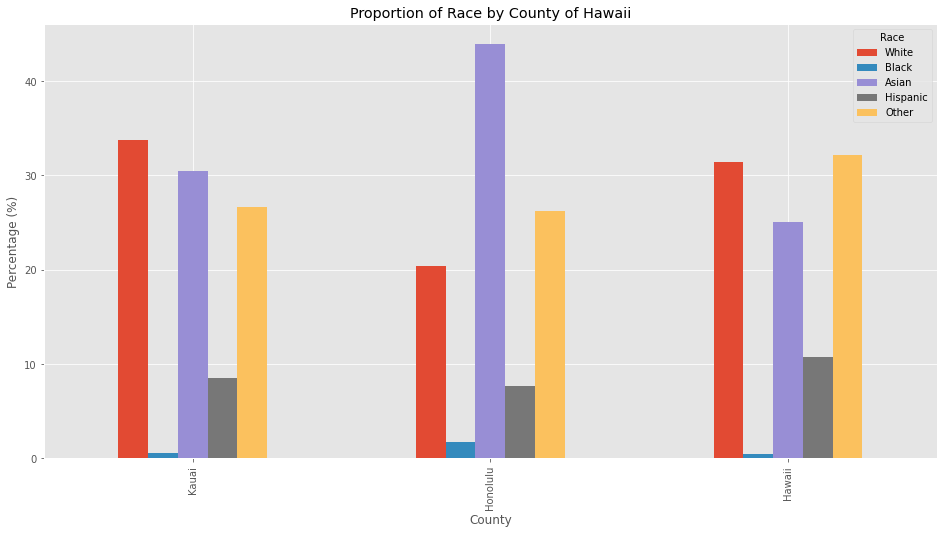

In [10]:
ax = prop_race_df.plot.bar(figsize = (16,8), title = 'Proportion of Race by County of Hawaii')
ax.set_xlabel("County")
ax.set_ylabel("Percentage (%)")
ax.legend(title = 'Race', loc = 'best', labels = ['White', 'Black', 'Asian', 'Hispanic', 'Other'])



## Analysis of Some Income and Socioeconomic Factors 
We took a look at some income factors that may be intersting to analyze if they differed by county. 

In [11]:
#What is the average % of income spent on rent in each county? 
percent_income_of_rent_by_race = df_gdp.select(df_gdp['county_name'], df_gdp['percent_income_spent_on_rent'])
income = percent_income_of_rent_by_race.groupBy(['county_name']).avg('percent_income_spent_on_rent').withColumnRenamed('county_name', 'County').withColumnRenamed('avg(percent_income_spent_on_rent)','Average % Income Spent on Rent')
income.na.drop().sort(desc('Average % Income Spent on Rent')).show()

+--------+------------------------------+
|  County|Average % Income Spent on Rent|
+--------+------------------------------+
|Honolulu|              32.9950757575758|
|  Hawaii|             32.42799999999994|
|   Kauai|            31.012244897959143|
+--------+------------------------------+



In [12]:
#How much personal income do people have in each county? 
personal_income_by_race = df_gdp.select(df_gdp['personal_income'],df_gdp['county_name'])
personal_income = personal_income_by_race.groupBy(['county_name']).sum('personal_income').withColumnRenamed('county_name', 'County').withColumnRenamed('sum(personal_income)','Total Personal Income')
personal_income.na.drop().sort(desc('Total Personal Income')).show()

+--------+---------------------+
|  County|Total Personal Income|
+--------+---------------------+
|Honolulu|         217071962004|
|  Hawaii|           6334588437|
|   Kauai|           1198911952|
|    Maui|             50086472|
+--------+---------------------+



In [13]:
#Unemployment rate by county over the years trend 
unemployment_df = df_un.toPandas()
unemployment_df.head()

,rate_annual_mean,county_name,Year
0,3.316667,Maui,2016
1,3.766667,Maui,2015
2,4.533333,Maui,2014
3,5.150000,Maui,2013
4,6.425000,Maui,2012


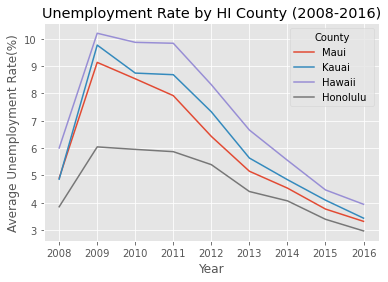

In [14]:
unemploy_graph = sns.lineplot(x = 'Year', y = 'rate_annual_mean', data = unemployment_df, hue = 'county_name')
unemploy_graph.set(title = 'Unemployment Rate by HI County (2008-2016)', xlabel = 'Year', ylabel = 'Average Unemployment Rate(%)')
unemploy_graph.legend(title = 'County', loc = 'best')

#### Results of Analysis
We chose to analyze rent burden because rent is one of the biggest personal expenses on disposable income and a person's socioeconomic standing which may affect their participation in voting. Honolulu, Hawaii, and Kauai residents, on average, all spend about 32% of their income on rent. 

Unemployment year trend is similar across the counties which may be attributed to systemic factors. From the graph, we can see that the unemployment rate is consistently lowest in the county of Honolulu followed by Maui, Kauai, and then Hawaii. 

### Number of voters by Race in Each Primary Election 
These stacked plots show the number of active voters by race in each election year of 2016, 2018, 2020. There is a growing trend of voter participation across all races as vote count has increased from each successive election. 

In [15]:
#select all active voters by their race in each primary election
voter_race_2020 = df.select(df['Primary_2020'], df['Race']).where((col('Primary_2020')== 'Y')).groupBy('Race').count().withColumnRenamed("count","Count 2020") 
voter_race_2018 = df.select(df['Primary_2018'], df['Race']).where((col('Primary_2018')== 'Y')).groupBy('Race').count().withColumnRenamed("count","Count 2018") 
voter_race_2016 = df.select(df['Primary_2016'], df['Race']).where((col('Primary_2016')== 'Y')).groupBy('Race').count().withColumnRenamed("count","Count 2016") 


In [16]:
#merge all three sets of results 
merge = voter_race_2020.join(voter_race_2018,['Race'])
merge2 = merge.join(voter_race_2016, ['Race'])

In [17]:
#reformat pd dataframe and data to visualize 
voter_race_py = merge2.toPandas()
voter_race_df = voter_race_py.set_index('Race')
voter_race_df.drop(['amerindian', 'two_or_more_races'], inplace = True)
large = voter_race_df.drop(['other', 'black'])
small = voter_race_df.drop(['white', 'asian', 'hispanic'])

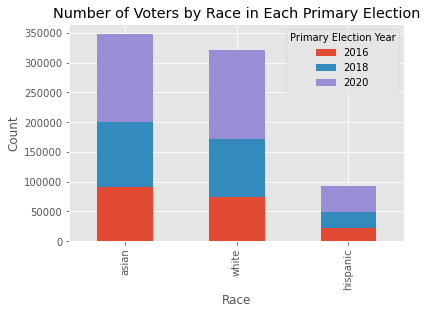

In [18]:
#plot of vote count of larger race population (white, asian, hispanic)
large[['Count 2016', 'Count 2018', 'Count 2020']].plot.bar(stacked = True)
plt.title('Number of Voters by Race in Each Primary Election')
plt.ylabel('Count')
plt.xlabel('Race')
plt.legend(title = 'Primary Election Year', labels = ['2016', '2018', '2020'])

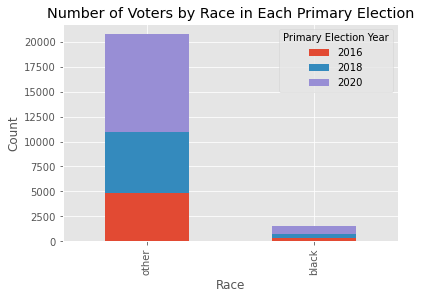

In [19]:
#plot of vote count of smaller race population (black, other)
small[['Count 2016', 'Count 2018', 'Count 2020']].plot.bar(stacked = True)
plt.title('Number of Voters by Race in Each Primary Election')
plt.ylabel('Count')
plt.xlabel('Race')
plt.legend(title = 'Primary Election Year', labels = ['2016', '2018', '2020'])

### Is there a similar proportion of active voters by ethnicity as exists in the population in a county in Hawaii?

<br>Answer： The active voter in 'Black' ethnicity is 85.43%, which is lower than that of any other race group (above 90%). Looking into the county level aggregation data, it can be seen that the percentage of the active voter of 'Black' ethnicity in 'Honolulu', 'Maui' and 'Hawaii' are around 83%. KAUAI is the only county that has the 'Black' active voter proportion above 91.4%.


**Race**|**Proportion_Active%**
---------|----------
Amerindian| 92.025
Asian |94.675
Black |85.425
Hispanic | 92.575
Other | 93.025
Two_or_more_races  |  94.000
White   |  90.025

According to the second figure, ‘White’, ‘Asian’ and ‘Hispanic' account for more than 95% of active user for every county in Hawaii. Several other races are composed of less than 5% of active voter. The percentage of active voter in ‘Black’ is low (less than 0.5% for every county).


In [20]:
# count of inactive/active in ethinicity in a county:
county_proportion = df.groupby('Race','County').count().withColumnRenamed('count','Count_All')

#count of activity in ethinicity in a county:
df_q2_1 = df.filter(df.Voters_Active == 'A')
county_proportion_a = df_q2_1.groupby('Race','County').count().withColumnRenamed('count','Count_Active')

In [21]:
q2_1 = county_proportion_a.join(county_proportion,on = ['Race','County'])
q2_1 = q2_1.withColumn('Proportion_Active%',F.round(F.col('Count_Active')*100/F.col('Count_All'),1)).toPandas()

In [22]:
q2_1.groupby('Race')['Proportion_Active%'].mean()

Race
amerindian           92.025
asian                94.675
black                85.425
hispanic             92.575
other                93.025
two_or_more_races    94.000
white                90.025
Name: Proportion_Active%, dtype: float64

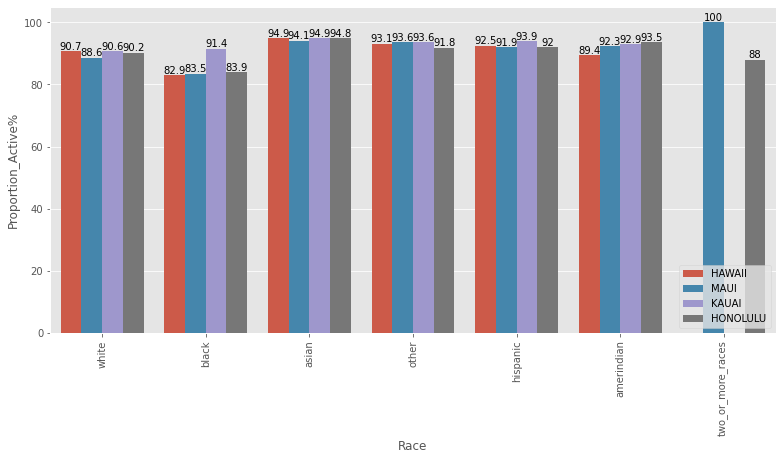

In [23]:
plt.figure(figsize=(13, 6))
ax = sns.barplot(x = 'Race' ,y ='Proportion_Active%' , data = q2_1, hue = 'County')

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation = 90)
plt.legend(loc='lower right')
plt.show()

In [24]:
q2_1

,Race,County,Count_Active,Count_All,Proportion_Active%
0,white,HAWAII,55927,61628,90.7
1,black,MAUI,147,176,83.5
2,asian,MAUI,18167,19316,94.1
3,other,KAUAI,1026,1096,93.6
4,white,HONOLULU,158491,175714,90.2
5,black,HONOLULU,1568,1870,83.9
6,hispanic,MAUI,13346,14525,91.9
7,other,HONOLULU,12395,13499,91.8
8,other,HAWAII,3018,3240,93.1
9,hispanic,KAUAI,6004,6395,93.9


In [25]:
q2_1['County_Total_Active'] = q2_1.groupby('County')['Count_Active'].transform(lambda x: x.sum())
q2_1['County_Total'] = q2_1.groupby('County')['Count_All'].transform(lambda x: x.sum())
q2_1['ActiveByRace_county'] = round(q2_1.Count_Active*100/q2_1.County_Total_Active,1)

In [26]:
q2_1

,Race,County,Count_Active,Count_All,Proportion_Active%,County_Total_Active,County_Total,ActiveByRace_county
0,white,HAWAII,55927,61628,90.7,94535,102751,59.2
1,black,MAUI,147,176,83.5,78419,86635,0.2
2,asian,MAUI,18167,19316,94.1,78419,86635,23.2
3,other,KAUAI,1026,1096,93.6,34888,37775,2.9
4,white,HONOLULU,158491,175714,90.2,418883,452987,37.8
5,black,HONOLULU,1568,1870,83.9,418883,452987,0.4
6,hispanic,MAUI,13346,14525,91.9,78419,86635,17.0
7,other,HONOLULU,12395,13499,91.8,418883,452987,3.0
8,other,HAWAII,3018,3240,93.1,94535,102751,3.2
9,hispanic,KAUAI,6004,6395,93.9,34888,37775,17.2


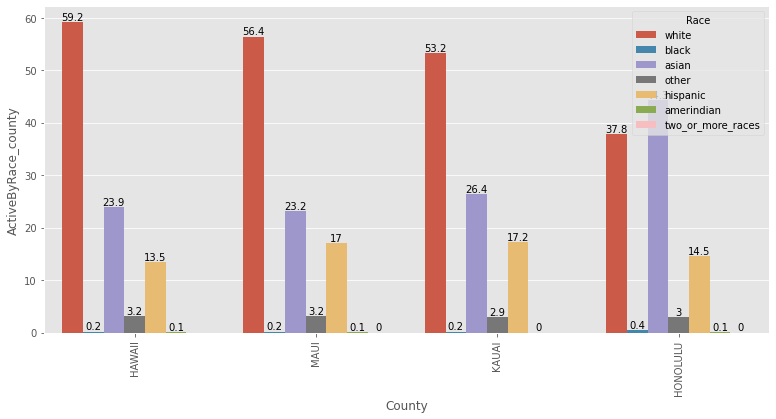

In [27]:
plt.figure(figsize=(13, 6))

ax1 = sns.barplot(x = 'County' ,y ='ActiveByRace_county' , data = q2_1, hue = 'Race')

for container in ax1.containers:
    ax1.bar_label(container)

plt.xticks(rotation = 90)
plt.show()

In [28]:
voter = df.repartition(20)
print("data was re-partitioned to {} partitions!".format(voter.rdd.getNumPartitions()))

# Setting the number of shuffle partitions
spark.conf.set("spark.sql.shuffle.partitions", "20")

# Caching the DataFrame
voter.cache()

data was re-partitioned to 20 partitions!


DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: string, VoterTelephones_LandlineAreaCode: int, VoterTelephones_Landline7Digit: string, VoterTelephones_LandlineFormatted: string, VoterTelephones_LandlineUnformatted: bigint, VoterTelephones_LandlineConfidenceCode: int, VoterTelephones_CellPhoneOnly: boolean, VoterTelephones_CellPhoneFormatted: string, VoterTelephones_CellPhoneUnformatted: bigint, VoterTelephones_CellConfidenceCode: int, Voters_FirstName: string, Voters_MiddleName: string, Voters_LastName: string, Voters_NameSuffix: string, Residence_Addresses_AddressLine: string, Residence_Addresses_ExtraAddressLine: string, Residence_Addresses_City: string, Residence_Addresses_State: string, Residence_Addresses_Zip: int, Residence_Addresses_ZipPlus4: int, Residence_Addresses_HouseNumber: string, Residence_Addresses_PrefixDirection: string, Residence_Addresses_StreetName: string, Residence_Addresses_Designator: string, R

In [29]:
voter = voter.drop('VoterTelephones_LandlineAreaCode', 'VoterTelephones_Landline7Digit', 'VoterTelephones_LandlineFormatted', 'VoterTelephones_LandlineUnformatted', 'VoterTelephones_LandlineConfidenceCode', 'VoterTelephones_CellPhoneOnly', 'VoterTelephones_CellPhoneFormatted', 'VoterTelephones_CellPhoneUnformatted', 'VoterTelephones_CellConfidenceCode')

In [30]:
gdp = df_gdp.repartition(20)
print("data was re-partitioned to {} partitions!".format(gdp.rdd.getNumPartitions()))

# Setting the number of shuffle partitions
spark.conf.set("spark.sql.shuffle.partitions", "20")

# Caching the DataFrame
gdp.cache()

data was re-partitioned to 20 partitions!


DataFrame[Year: string, GeoFIPS: int, GeoName: string, Employer_contrib_pension_and_insurance: int, Employer_contrib_govt_and_social_insurance: int, Farm_proprietors_income: int, Nonfarm_proprietors_income: int, Farm_proprietors_employment: int, Income_maintenance_benefits: int, Nonfarm_proprietors_employment: int, Percapita_income_maintenance_benefits: int, Percapita_retirement_and_other: int, Percapita_unemployment_insurance_compensation: int, Proprietors_income: int, Retirement_and_other: int, Wages_and_salaries_supplement: int, Unemployment_insurance: int, Wages_and_salaries: int, Nonfarm_proprietors_income_avg: int, Wages_and_salaries_avg: int, Dividends_interest_rent: int, Earnings_by_place_of_work: int, Net_earnings_by_place_of_residence: int, Percapita_dividends_interest_rent: int, Percapita_net_earnings: int, Percapita_personal_current_transfer_receipts: int, Percapita_personal_income: int, Personal_current_transfer_receipts: int, Population: int, Proprietors_employment: int, 

In [31]:
from pyspark.sql.functions import split
from pyspark.sql.functions import *

# Load gdp data and deal with county column to match that of voter data
gdp = gdp.withColumn("county", split(col("county"), "\\+").getItem(0))\
         .withColumn('County', regexp_replace('county', 'Hawaii', 'HAWAII'))\
         .withColumn('County', regexp_replace('county', 'Maui', 'MAUI'))\
         .withColumn('County', regexp_replace('county', 'Kauai', 'KAUAI'))\
         .withColumn('County', regexp_replace('county', 'Honolulu', 'HONOLULU'))
# gdp.select(['county']).distinct().show()

### Analysis on Year of 2016

In [32]:
# Select columns contain ethnicity & race from voter data
select_eth = [s for s in voter.columns if 'Ethnic' in s]
# Select columns contain year = 2016
select_year = [s for s in voter.columns if '2016' in s]

# Select voter data with those column names
voter_2016 = voter.select(select_year + select_eth + ['Race', 'Voters_Active', 'County'])
voter_2016 = voter_2016.na.fill(value='N',subset=["Primary_2016"])
voter_2016 = voter_2016.na.fill(value='N',subset=["General_2016"])

In [33]:
# show number of null values in the selected data of 2016
num_null = voter_2016.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in voter_2016.columns])
num_null.toPandas()

,General_2016,Primary_2016,PresidentialPrimary_2016,OtherElection_2016,PRI_BLT_2016,Ethnic_Description,EthnicGroups_EthnicGroup1Desc,CountyEthnic_LALEthnicCode,CountyEthnic_Description,Race,Voters_Active,County
0,0,0,792412,792412,576926,112264,112264,792412,792412,112264,0,0


In [34]:
voter_2016.select(['Race']).distinct().show()

+-----------------+
|             Race|
+-----------------+
|         hispanic|
|             null|
|            black|
|       amerindian|
|            other|
|            asian|
|two_or_more_races|
|            white|
+-----------------+



**What is the voter participation by ethnicity in 2016?**

In [35]:
# count active voters group by race
active_per_race = voter_2016.where(F.col("Voters_Active") == 'A')\
                    .groupBy(F.col('Race').alias('Race'))\
                    .agg(F.count("Voters_Active").alias("active_count"))

# count inactive voters group by race
inactive_per_race = voter_2016.where(F.col("Voters_Active") == 'I')\
                    .groupBy(F.col('Race').alias('Race'))\
                    .agg(F.count("Voters_Active").alias("inactive_count"))

# join active and inactive, and calculate active rate
x1 = active_per_race.join(inactive_per_race, "Race")\
                   .withColumn("active_rate", F.round(F.col("active_count")/(F.col("active_count")+F.col("inactive_count"))*100, 2))\
                   .orderBy('active_rate').toPandas()
x1

,Race,active_count,inactive_count,active_rate
0,black,2002,382,83.98
1,two_or_more_races,23,3,88.46
2,white,277199,30529,90.08
3,hispanic,92728,7869,92.18
4,other,18915,1565,92.36
5,amerindian,467,36,92.84
6,asian,235391,13039,94.75


Text(0, 0.5, 'Active Rate')

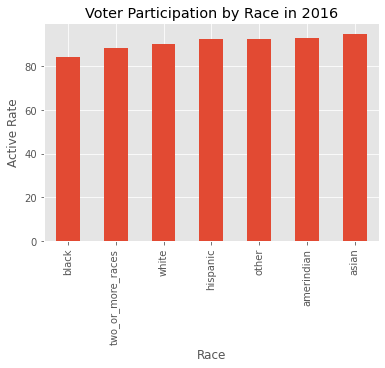

In [36]:
# Plot
x1 = x1.set_index('Race')
x1["active_rate"].plot.bar()
plt.title('Voter Participation by Race in 2016');
plt.xlabel("Race")
plt.ylabel("Active Rate")

**What is the voter participation by county in 2016?**

In [37]:
# count active voters group by county
active_per_county = voter_2016.where(F.col("Voters_Active") == 'A')\
                    .groupBy(F.col('County').alias('County'))\
                    .agg(F.count("Voters_Active").alias("active_count"))

# count inactive voters group by county
inactive_per_county = voter_2016.where(F.col("Voters_Active") == 'I')\
                    .groupBy(F.col('County').alias('County'))\
                    .agg(F.count("Voters_Active").alias("inactive_count"))

# join active and inactive, and calculate active rate
x2 = active_per_county.join(inactive_per_county, "County")\
                      .withColumn("active_rate", F.round(F.col("active_count")/(F.col("active_count")+F.col("inactive_count"))*100, 2))\
                      .orderBy('active_rate').toPandas()
x2 = x2.set_index('County')
x2

,active_count,inactive_count,active_rate
County,,,
MAUI,92851,9849,90.41
HAWAII,111964,9845,91.92
KAUAI,41113,3497,92.16
HONOLULU,482383,40910,92.18


Text(0, 0.5, 'Active Rate')

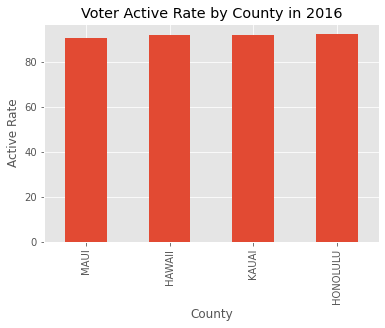

In [38]:
# Plot
x2["active_rate"].plot.bar()
plt.title('Voter Active Rate by County in 2016');
plt.xlabel("County")
plt.ylabel("Active Rate")

**What is the proportion of each rent bracket changed by ethnicity in each county in 2016?**

In [149]:
# Choose data of 2016 from the gdp data
gdp = gdp.withColumn("Year", F.year("Year"))
gdp_2016 = gdp.where(F.col("Year") == '2016')
# Drop the only null value in the columns of total population and populations of different race
gdp_2016 = gdp_2016.filter(gdp_2016.total_pop.isNotNull())

In [150]:
# Select columns contain rent from gdp data of 2016
select_rent = [s for s in gdp_2016.columns if 'rent' in s]
# Select columns contain population from gdp data of 2016
select_pop = [s for s in gdp_2016.columns if 'pop' in s]

# Select gdp data of 2016 with those column names
rent = gdp_2016.select(select_rent + select_pop + ['county'])

# Add three divisions of rent burden range: under 25 / 25-50 / over 50
rent = rent.withColumn('pop_rent_over_50', F.col('rent_over_50_percent'))\
           .withColumn('pop_rent_under_25', (F.col('rent_under_10_percent')+F.col('rent_10_to_15_percent')+F.col('rent_15_to_20_percent')+F.col('rent_20_to_25_percent')))\
           .withColumn('pop_rent_25_to_50', (F.col('rent_25_to_30_percent')+F.col('rent_30_to_35_percent')+F.col('rent_35_to_40_percent')+F.col('rent_40_to_50_percent')))


In [151]:
# Select county of hawaii
rent_hawaii = rent.where(F.col('County')=='HAWAII')\
                  .agg(sum("white_pop").alias("white"), \
                       sum("black_pop").alias("black"),\
                       sum("asian_pop").alias("asian"),\
                       sum("hispanic_pop").alias("hispanic"),\
                       sum("amerindian_pop").alias("amerindian"),\
                       sum('two_or_more_races_pop').alias("two_or_more_races"),\
                       sum("other_race_pop").alias("other"),\
                       sum("pop_rent_under_25").alias("rent_under_25"),\
                       sum("pop_rent_25_to_50").alias("rent_25_to_50"),\
                       sum("pop_rent_over_50").alias("rent_over_50"),\
                       sum('rent_burden_not_computed').alias('rent_burden_not_computed'))
rent_hawaii.toPandas()

,white,black,asian,hispanic,amerindian,two_or_more_races,other,rent_under_25,rent_25_to_50,rent_over_50,rent_burden_not_computed
0,56815,947,42562,20338,447,39176,388,7208,6269,5359,2955


In [152]:
# Select county of honolulu
rent_honolulu = rent.where(F.col('County')=='HONOLULU')\
                  .agg(sum("white_pop").alias("white"), \
                       sum("black_pop").alias("black"),\
                       sum("asian_pop").alias("asian"),\
                       sum("hispanic_pop").alias("hispanic"),\
                       sum("amerindian_pop").alias("amerindian"),\
                       sum('two_or_more_races_pop').alias("two_or_more_races"),\
                       sum("other_race_pop").alias("other"),\
                       sum("pop_rent_under_25").alias("rent_under_25"),\
                       sum("pop_rent_25_to_50").alias("rent_25_to_50"),\
                       sum("pop_rent_over_50").alias("rent_over_50"),\
                       sum('rent_burden_not_computed').alias('rent_burden_not_computed'))
rent_honolulu.toPandas()

,white,black,asian,hispanic,amerindian,two_or_more_races,other,rent_under_25,rent_25_to_50,rent_over_50,rent_burden_not_computed
0,181104,17461,410237,74077,1319,170079,1089,38661,46584,32495,11533


In [153]:
# Select county of kauai
rent_kauai = rent.where(F.col('County')=='KAUAI')\
                  .agg(sum("white_pop").alias("white"), \
                       sum("black_pop").alias("black"),\
                       sum("asian_pop").alias("asian"),\
                       sum("hispanic_pop").alias("hispanic"),\
                       sum("amerindian_pop").alias("amerindian"),\
                       sum('two_or_more_races_pop').alias("two_or_more_races"),\
                       sum("other_race_pop").alias("other"),\
                       sum("pop_rent_under_25").alias("rent_under_25"),\
                       sum("pop_rent_25_to_50").alias("rent_25_to_50"),\
                       sum("pop_rent_over_50").alias("rent_over_50"),\
                       sum('rent_burden_not_computed').alias('rent_burden_not_computed'))
rent_kauai.toPandas()

,white,black,asian,hispanic,amerindian,two_or_more_races,other,rent_under_25,rent_25_to_50,rent_over_50,rent_burden_not_computed
0,20040,446,21356,6150,68,11446,16,2753,2472,1631,747


In [154]:
rent_pop_dist = rent_hawaii.union(rent_honolulu).union(rent_kauai).toPandas()
county_name = ['hawaii', 'honolulu', 'kauai']
rent_pop_dist['county'] = county_name
rent_pop_dist = rent_pop_dist.set_index('county')
rent_pop_dist

,white,black,asian,hispanic,amerindian,two_or_more_races,other,rent_under_25,rent_25_to_50,rent_over_50,rent_burden_not_computed
county,,,,,,,,,,,
hawaii,56815,947,42562,20338,447,39176,388,7208,6269,5359,2955
honolulu,181104,17461,410237,74077,1319,170079,1089,38661,46584,32495,11533
kauai,20040,446,21356,6150,68,11446,16,2753,2472,1631,747


In [155]:
# Extract rent bracket information
rent_dist = rent_pop_dist.T
rent_dist = rent_dist.iloc[-4:]
rent_dist

county,hawaii,honolulu,kauai
rent_under_25,7208,38661,2753
rent_25_to_50,6269,46584,2472
rent_over_50,5359,32495,1631
rent_burden_not_computed,2955,11533,747


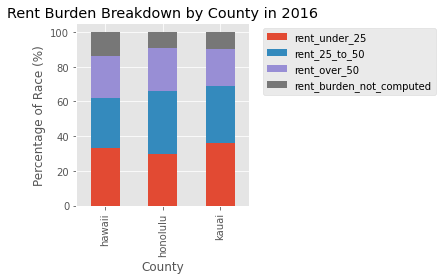

In [156]:
# Plot
rent_dist.transpose().apply(lambda x: x*100/float(x.sum()), axis=1).plot(kind="bar", stacked=True)
plt.title("Rent Burden Breakdown by County in 2016")
plt.xlabel("County")
plt.ylabel("Percentage of Race (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

**How population is made up of by race of each county?**

In [157]:
# Transpose the previous dataframe obtained
pop_dist = rent_pop_dist.T
# Extract racial information
pop_dist = pop_dist.iloc[:6]
pop_dist

county,hawaii,honolulu,kauai
white,56815,181104,20040
black,947,17461,446
asian,42562,410237,21356
hispanic,20338,74077,6150
amerindian,447,1319,68
two_or_more_races,39176,170079,11446


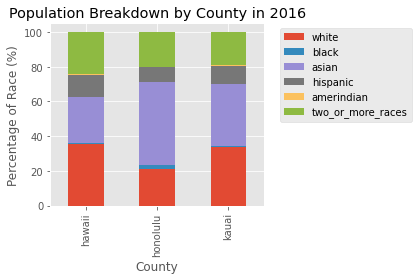

In [158]:
# Plot
pop_dist.transpose().apply(lambda x: x*100/float(x.sum()), axis=1).plot(kind="bar", stacked=True)
plt.title("Population Breakdown by County in 2016")
plt.xlabel("County")
plt.ylabel("Percentage of Race (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

Results of how each county voted (democratic or republican candidate) to voter participation by ethnicity in that county (see if there are findings that could suggest that county results may be influenced by voter participation/if certain ethnic groups were not represented well).


**Findings from this point would especially help in our recommendations**

In [159]:
# Select county of hawaii, group by Primary Election Ballot
ha_2016 = voter_2016.where(F.col('County')=='HAWAII').groupBy('PRI_BLT_2016').count()
# Select county of honolulu, group by Primary Election Ballot
honolulu_2016 = voter_2016.where(F.col('County')=='HONOLULU').groupBy('PRI_BLT_2016').count()
# Select county of kauai, group by Primary Election Ballot
kauai_2016 = voter_2016.where(F.col('County')=='KAUAI').groupBy('PRI_BLT_2016').count()

# Join, and convert to DataFrame and arrange column names
x4 = ha_2016.join(honolulu_2016, "PRI_BLT_2016")
x4 = x4.join(kauai_2016, "PRI_BLT_2016").toPandas()
x4 = x4.set_index('PRI_BLT_2016')
x4 = x4.set_axis(['hawaii', 'honolulu', 'kauai'], axis=1, inplace=False)
x4

,hawaii,honolulu,kauai
PRI_BLT_2016,,,
R,4927,31684,1463
O,14485,55382,5142
D,15247,58223,5850


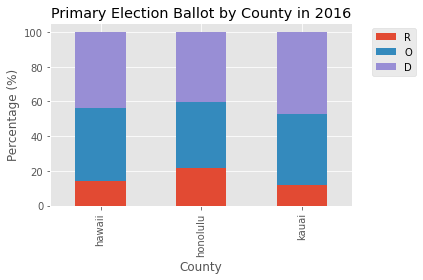

In [160]:
# Plot
x4.transpose().apply(lambda x: x*100/float(x.sum()), axis=1).plot(kind="bar", stacked=True)
plt.title("Primary Election Ballot by County in 2016")
plt.xlabel("County")
plt.ylabel("Percentage (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [161]:
# Select county of hawaii, group by Primary & General
ha_general_2016 = voter_2016.where(F.col('County')=='HAWAII').groupBy('General_2016', 'Primary_2016').count()
# Select county of hawaii, group by Primary & General
honolulu_general_2016 = voter_2016.where(F.col('County')=='HONOLULU').groupBy('General_2016', 'Primary_2016').count()
# Select county of hawaii, group by Primary & General
kauai_general_2016 = voter_2016.where(F.col('County')=='KAUAI').groupBy('General_2016', 'Primary_2016').count()

# Join, and convert to DataFrame and arrange column names
x5 = ha_general_2016.join(honolulu_general_2016, ["General_2016", 'Primary_2016'])
x5 = x5.join(kauai_general_2016, ["General_2016", 'Primary_2016']).toPandas()
x5['G&P_2016'] = ['Both not','Both Yes','Yes for General', 'Yes for Primary']
x5 = x5.set_index('G&P_2016')
x5 = x5.set_axis(['General_2016', 'Primary_2016', 'hawaii', 'honolulu', 'kauai'], axis=1, inplace=False)
x5 = x5[['hawaii', 'honolulu', 'kauai']]
x5

,hawaii,honolulu,kauai
G&P_2016,,,
Both not,21707,103263,9944
Both Yes,2879,10804,902
Yes for General,31780,134485,11553
Yes for Primary,65443,274741,22211


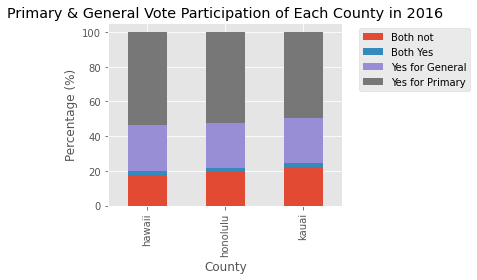

In [162]:
# Plot
x5.transpose().apply(lambda x: x*100/float(x.sum()), axis=1).plot(kind="bar", stacked=True)
plt.title("Primary & General Vote Participation of Each County in 2016")
plt.xlabel("County")
plt.ylabel("Percentage (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [53]:
# Participation of Primary round group by race in hawaii
par_by_race = voter_2016.where(F.col('County')=='HAWAII')\
                        .where(F.col("Primary_2016") == 'Y')\
                        .groupBy(F.col('Race').alias('Race'))\
                        .agg(F.count("Primary_2016").alias("active"))

inactive_by_race = voter_2016.where(F.col('County')=='HAWAII')\
                             .where(F.col("Primary_2016") == 'N')\
                             .groupBy(F.col('Race').alias('Race'))\
                             .agg(F.count("Primary_2016").alias("inactive"))

x6 = par_by_race.join(inactive_by_race, "Race").orderBy(F.desc('active')).toPandas()
x6 = x6.set_index('Race')

In [54]:
# Participation of Primary round group by race in honolulu
par_by_race_honolulu = voter_2016.where(F.col('County')=='HONOLULU')\
                        .where(F.col("Primary_2016") == 'Y')\
                        .groupBy(F.col('Race').alias('Race'))\
                        .agg(F.count("Primary_2016").alias("active"))

inactive_by_race_honolulu = voter_2016.where(F.col('County')=='HONOLULU')\
                             .where(F.col("Primary_2016") == 'N')\
                             .groupBy(F.col('Race').alias('Race'))\
                             .agg(F.count("Primary_2016").alias("inactive"))

x7 = par_by_race_honolulu.join(inactive_by_race_honolulu, "Race").orderBy(F.desc('active')).toPandas()
x7 = x7.set_index('Race')

In [55]:
# Participation of Primary round group by race in kauai
par_by_race_kauai = voter_2016.where(F.col('County')=='KAUAI')\
                        .where(F.col("Primary_2016") == 'Y')\
                        .groupBy(F.col('Race').alias('Race'))\
                        .agg(F.count("Primary_2016").alias("active"))

inactive_by_race_kauai = voter_2016.where(F.col('County')=='KAUAI')\
                             .where(F.col("Primary_2016") == 'N')\
                             .groupBy(F.col('Race').alias('Race'))\
                             .agg(F.count("Primary_2016").alias("inactive"))

x8 = par_by_race_kauai.join(inactive_by_race_kauai, "Race").orderBy(F.desc('active')).toPandas()
x8 = x8.set_index('Race')

**Primary Round Participation Breakdown by Race in 2016**

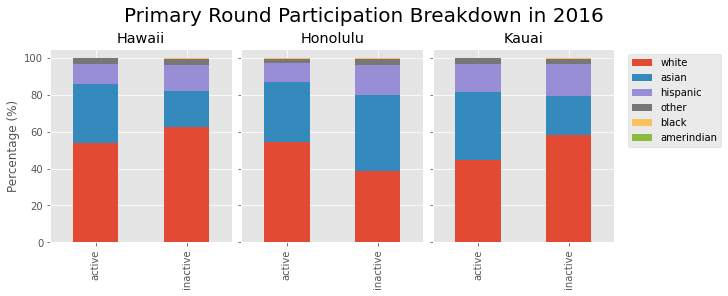

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), sharey=True, constrained_layout=True)
fig.suptitle("Primary Round Participation Breakdown in 2016", fontsize = 20)
x6.transpose().apply(lambda x: x*100/float(x.sum()), axis=1).plot(ax=ax1, kind="bar", stacked=True, title = 'Hawaii', legend = False, ylabel = "Percentage (%)")
x7.transpose().apply(lambda x: x*100/float(x.sum()), axis=1).plot(ax=ax2, kind="bar", stacked=True, title = 'Honolulu', legend = False)
x8.transpose().apply(lambda x: x*100/float(x.sum()), axis=1).plot(ax=ax3, kind="bar", stacked=True, title = 'Kauai')
ax3.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

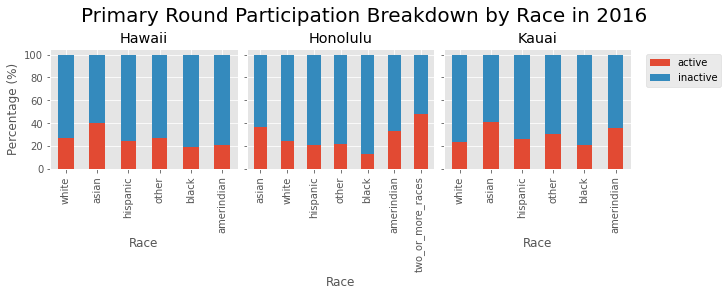

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), sharey=True, constrained_layout=True)
fig.suptitle("Primary Round Participation Breakdown by Race in 2016", fontsize = 20)
x6.apply(lambda x: x*100/float(x.sum()), axis=1).plot(ax=ax1, kind="bar", stacked=True, title = 'Hawaii', legend = False, ylabel = "Percentage (%)")
x7.apply(lambda x: x*100/float(x.sum()), axis=1).plot(ax=ax2, kind="bar", stacked=True, title = 'Honolulu', legend = False)
x8.apply(lambda x: x*100/float(x.sum()), axis=1).plot(ax=ax3, kind="bar", stacked=True, title = 'Kauai')
ax3.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# 3. Active Status Prediction Using Random Forest Classfier

**1. Feature selection**
The goal of our project is to investigate factors that affect voter participation with an emphasis on socioeconomic status and demographic factors. In this section, we run a random forest classifier to predict the active status of an individual ('Voters_Active'). Other than basic demographic infomration, We put special effort in selecting features that reflect the socioeconomic status. We also added several columns containing voting status information across years to capture the variance of voting status in time. The following table shows the selected variables for our classifier model：

**Column**|**Category**
---------|----------
CommercialData_HomePurchasePrice| Socioeconomic
CommercialDataLL_Business_Owner | Socioeconomic
CommercialData_ISPSA| Socioeconomic
CommercialData_UpscaleBuyerInHome | Socioeconomic
CommercialData_OccupationGroup | Socioeconomic
CommercialData_EstimatedHHIncomeAmount | Socioeconomic
CommercialData_Occupation | Socioeconomic
CommercialData_PropertyType | Socioeconomic
CommercialData_StateIncomeDecile | Socioeconomic
Residence_Addresses_ApartmentType | Socioeconomic
Race| Ethnic
General_2016|Time_related
General_2018|Time_related
General_2020|Time_related
PRI_BLT_2016|Time_related
PRI_BLT_2018|Time_related
PRI_BLT_2020|Time_related
Voters_Gender |Demographic
Voters_Age |Demographic
County |Demographic
Residence_Addresses_City |Demographic

**2. Deal with imbalanced class**
The label we are trying to predict is imbalanced. 91.91% of voters are labeled as 'Active', whereas only 8.08% are inactive. The following table shows the statstics about the label.

**Column**|**Category**
:---------|:----------
inactive voters %| 8.08%
active voters %|91.91%
male active voters %| 91.62%
femaile active voters %| 92.16%

We want to combine random oversampling and undersampling to generate a more balanced dataset. There is no assumption made about data and no heuristics are used for resampling process. It is simple to implement and fast to execute. This can be desirable for very large and complex datasets.

**Result and analysis**: After the resampling, we get an balanced dataset such as the number of active and inactive user is the same. We use GBTClassifier for the prediction. The Precision-Recall Area Under Curve (AUC) Score for our model is 0.838.

In [7]:
# Construct ML dataset: select features and label
ML_column = ['Race','General_2016','General_2018','General_2020','PRI_BLT_2020','PRI_BLT_2018',\
           'PRI_BLT_2016','Voters_Active','CommercialData_EstimatedHHIncomeAmount',\
            'CommercialData_Occupation','CommercialData_OccupationGroup','CommercialData_UpscaleBuyerInHome',\
            'CommercialData_ISPSA','CommercialDataLL_Business_Owner','Voters_Gender','Voters_Age','County',\
             'Residence_Addresses_City','CommercialData_HomePurchasePrice','CommercialData_PropertyType',\
             'CommercialData_StateIncomeDecile','Residence_Addresses_ApartmentType']
df_ML = df.select(ML_column)

In [8]:
# Datapreprocessing
def datapreprocessing(df_ML):
    df_ML = df_ML.withColumn('CommercialData_EstimatedHHIncomeAmount',\
                         F.expr("TRIM(LEADING '$' FROM CommercialData_EstimatedHHIncomeAmount)").cast('int'))
    
    df_ML = df_ML.withColumn('CommercialData_HomePurchasePrice',\
                         F.expr("TRIM(LEADING '$' FROM CommercialData_HomePurchasePrice)").cast('int'))

    # Work with null value - string
    df_ML = df_ML.fillna('Unknown', subset = ['Race','General_2016','General_2018','General_2020','PRI_BLT_2020',\
                                    'PRI_BLT_2018','PRI_BLT_2016','CommercialData_Occupation',\
                                    'CommercialData_OccupationGroup','CommercialDataLL_Business_Owner',\
                                    'Voters_Gender','County','Residence_Addresses_City',\
                                    'CommercialData_PropertyType','Residence_Addresses_ApartmentType','Voters_Active'])

    # working with null value - integer
    df_ML = df_ML.fillna(-1, subset = ['CommercialData_EstimatedHHIncomeAmount','CommercialData_UpscaleBuyerInHome',\
                                        'CommercialData_ISPSA','Voters_Age','CommercialData_HomePurchasePrice',\
                                        'CommercialData_StateIncomeDecile'])
    
    return df_ML

df_ML = datapreprocessing(df_ML)

In [9]:
# Check the ratio of active/inactive user
major_ml_df = df_ML.filter(col("Voters_Active") == 'A')
minor_ml_df = df_ML.filter(col("Voters_Active") == 'I')
ratio = int(major_ml_df.count()/minor_ml_df.count())
print("The oringinal ratio is {}".format(ratio))

The oringinal ratio is 11


In [10]:
# Oversampling to the ratio of 5:11
# duplicate the minority rows
a = range(5)
oversampled_minor_df = minor_ml_df.withColumn("dummy", F.explode(F.array([F.lit('I') for x in a]))).drop('dummy')

# Downampling to the ratio of 1:1
ratio = int(major_ml_df.count()/oversampled_minor_df.count())
sampled_majority_df = major_ml_df.sample(False, 1/ratio)

combined_df = sampled_majority_df.unionAll(oversampled_minor_df)

In [11]:
# Check the ratio ratio after resampling
ratio = int(sampled_majority_df.count()/oversampled_minor_df.count())
print("The ratio after resampling is {}".format(ratio))

The ratio after resampling is 1


In [13]:
supervised = RFormula(formula="Voters_Active ~ . ")
fittedRF = supervised.fit(combined_df)
preparedDF = fittedRF.transform(combined_df)

In [14]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import RFormula
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# set up the pipline
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 843)
rf = RandomForestClassifier(featuresCol = 'features',
                           labelCol = 'label',
                           seed = 843)

model = rf.fit(train)
predictions = model.transform(test)

In [16]:
# Model evaluation:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
areaUnderPR = evaluator.evaluate(predictions)
print("areaUnderPR = %s" % (areaUnderPR))

areaUnderPR = 0.8391366434671724


In [65]:
# Machine learning
# prepare train test data


from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features',
                           labelCol = 'label',
                           seed = 843)
model = rf.fit(train)
predictions = model.transform(test)

In [66]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
areaUnderPR = evaluator.evaluate(predictions)
print("areaUnderPR = %s" % (areaUnderPR))

areaUnderPR = 0.8388575542005741


# 4. Improving racial disparity in US voter participation with a focus on Independent Voters


In this section, we'll investigate factors that affect voter participation to isolate some of the causes of voter disparity with an emphasis on variables that relate to independent voters.

### Who are independent voters?

The simple definition of an independent is a person who does not affiliate with the Democratic or Republican Party. 

### Why they are important?

In fact, most independents aren’t independent at all. They hold clear partisan preferences, but they utterly refuse to identify with their preferred party. In some states, independent/undeclared voters determine who wins in the election. 

# 4.1 Hawaii (HI)
Hawaii, the 50th state, has 4 Electoral Votes. Hawaiians have voted Democratic in every election except the 1972 and 1984 contests.

In [4]:
hi = spark.read.format("csv")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("delimiter","\t")\
.schema(VoterSchema)\
.load("gs://is843-team-6/VM2Uniform--HI--2021-04-01.tab")

In [5]:
hi.cache()

22/05/02 00:50:05 WARN org.apache.spark.sql.execution.CacheManager: Asked to cache already cached data.


DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: string, VoterTelephones_LandlineAreaCode: int, VoterTelephones_Landline7Digit: string, VoterTelephones_LandlineFormatted: string, VoterTelephones_LandlineUnformatted: bigint, VoterTelephones_LandlineConfidenceCode: int, VoterTelephones_CellPhoneOnly: boolean, VoterTelephones_CellPhoneFormatted: string, VoterTelephones_CellPhoneUnformatted: bigint, VoterTelephones_CellConfidenceCode: int, Voters_FirstName: string, Voters_MiddleName: string, Voters_LastName: string, Voters_NameSuffix: string, Residence_Addresses_AddressLine: string, Residence_Addresses_ExtraAddressLine: string, Residence_Addresses_City: string, Residence_Addresses_State: string, Residence_Addresses_Zip: int, Residence_Addresses_ZipPlus4: int, Residence_Addresses_HouseNumber: string, Residence_Addresses_PrefixDirection: string, Residence_Addresses_StreetName: string, Residence_Addresses_Designator: string, R

In [7]:
hi_data = df.select(
    'LALVOTERID', 
    'Mailing_Families_FamilyID', 
    'Voters_Gender', 
    'Voters_OfficialRegDate', 
    'CommercialData_EstimatedHHIncomeAmount', 'CommercialData_EstimatedAreaMedianHHIncome',
    'Residence_Addresses_Zip',
    'Residence_Addresses_Latitude', 'Residence_Addresses_Longitude',
    'Ethnic_Description', 'EthnicGroups_EthnicGroup1Desc', 
    'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016'    
)
#hi_data.toPandas().to_csv('hi.csv')

### 4.1.1 EDA
#### Party Types in HI
There are 360,868 (45.54%) independent voters in Hawaii.

In [67]:
hi.select('Parties_Description').groupby('Parties_Description').count().toPandas()

,Parties_Description,count
0,Democratic,312001
1,Non-Partisan,360868
2,Republican,119543


In [68]:
(hi.select('Parties_Description').filter(hi['Parties_Description'] == 'Non-Partisan')\
 .count())/(hi.select('Parties_Description').count())

0.4554045117943696

#### Ethinic Types and Groups in HI

In [69]:
hi.select('Ethnic_Description', 'EthnicGroups_EthnicGroup1Desc').distinct()\
.orderBy('EthnicGroups_EthnicGroup1Desc').toPandas()

,Ethnic_Description,EthnicGroups_EthnicGroup1Desc
0,None,None
1,Tibetan,East and South Asian
2,Japanese,East and South Asian
3,Thai,East and South Asian
4,Indonesian,East and South Asian
...,...,...
77,Pakistani,Other
78,Arab,Other
79,Persian,Other
80,Albanian,Other


In [70]:
hi_data.select('EthnicGroups_EthnicGroup1Desc').groupby('EthnicGroups_EthnicGroup1Desc').count().toPandas()

,EthnicGroups_EthnicGroup1Desc,count
0,Hispanic and Portuguese,107995
1,None,112264
2,Other,64746
3,Likely African-American,2384
4,East and South Asian,213342
5,European,291681


In Hawaii, there are 291,681 European voters, 213,342 East and South Asain voters, 107,995 Hispanic and Portuguese voters.

#### Number of Independent voters by Ethnic types

In [71]:
hi_np = hi_data.filter(hi_data['Parties_Description'] == 'Non-Partisan')
hi_ethnic_np = hi_np.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')

from pyspark.sql.functions import desc, col

hi_ethnic_np_num = hi_ethnic_np.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

hi_ethnic_np_num = hi_ethnic_np_num.toPandas().dropna()

hi_ethnic_np_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Non-Partisan,European,English/Welsh,75165
2,Non-Partisan,East and South Asian,Japanese,55840
3,Non-Partisan,East and South Asian,Chinese,23197
4,Non-Partisan,Other,Filipino,19323
5,Non-Partisan,Hispanic and Portuguese,Hispanic,17563
6,Non-Partisan,European,German,14742
7,Non-Partisan,European,Irish,14696
8,Non-Partisan,European,Scots,11704
9,Non-Partisan,Other,Hawaiian,10871
10,Non-Partisan,European,Italian,10538


In Hawaii, there are 55840  Japanese independent voters, and 23197 Chinese voters. These are the two biggest ethnic groups in among all the independent voters.

#### Compare to Democratic & Republican voters participant in general/primary election 

In [72]:
hi_d = hi_data.filter(hi_data['Parties_Description'] == 'Democratic')
hi_ethnic_d = hi_d.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')


hi_ethnic_d_num = hi_ethnic_d.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

hi_ethnic_d_num = hi_ethnic_d_num.toPandas().dropna()

hi_ethnic_d_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Democratic,Hispanic and Portuguese,Hispanic,77404
1,Democratic,East and South Asian,Japanese,50782
2,Democratic,European,English/Welsh,47420
4,Democratic,East and South Asian,Chinese,14181
5,Democratic,Other,Filipino,11657
6,Democratic,European,German,8995
7,Democratic,European,Irish,8981
8,Democratic,European,Scots,7181
9,Democratic,Other,Hawaiian,7017
10,Democratic,European,Italian,6986


Hispanic and Japanese are the two biggest ethnic groups in Democratics.

In [73]:
hi_r = hi_data.filter(hi_data['Parties_Description'] == 'Republican')
hi_ethnic_r = hi_r.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')


hi_ethnic_r_num = hi_ethnic_r.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

hi_ethnic_r_num = hi_ethnic_r_num.toPandas().dropna()

hi_ethnic_r_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Republican,East and South Asian,Japanese,28380
1,Republican,European,English/Welsh,26816
2,Republican,East and South Asian,Chinese,10640
4,Republican,Hispanic and Portuguese,Hispanic,5630
5,Republican,European,German,5372
6,Republican,European,Irish,5246
7,Republican,European,Scots,4087
8,Republican,Other,Filipino,3985
9,Republican,European,Italian,3770
10,Republican,Other,Hawaiian,2241


Japanese and English/Welsh are the two biggest ethnic groups in Republican.

#### Number of independent voters participant in general/primary election 

In [74]:
hi_np_election = hi_np.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')

hi_np_election_num = hi_np_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [75]:
hi_np_election_num.count()

LALVOTERID      360868
General_2020    252686
Primary_2020    166892
General_2018    152372
Primary_2018    102271
General_2016    142903
Primary_2016     78033
dtype: int64

#### Compared to Democratic voters participant in general/primary election 

In [76]:
hi_d_election = hi_d.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')

hi_d_election_num = hi_d_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [77]:
hi_d_election_num.count()

LALVOTERID      312001
General_2020    220001
Primary_2020    158679
General_2018    149142
Primary_2018    112702
General_2016    144495
Primary_2016     93084
dtype: int64

In [78]:
hi_r_election = hi_r.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')

hi_r_election_num = hi_r_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [79]:
hi_r_election_num.count()

LALVOTERID      119543
General_2020     96519
Primary_2020     73888
General_2018     70674
Primary_2018     52812
General_2016     68515
Primary_2016     44369
dtype: int64

Number of independent and Democratic voters participant in general/primary election has been substantially increasing since 2016

#### Non-Partisan Primary Ballot Results in 2020, 2018 and 2016

In [80]:
hi_np_blt_2020 = hi_np_election.select('PRI_BLT_2020').toPandas()
hi_np_blt_2020.value_counts()

PRI_BLT_2020
O               155504
D                 6983
R                 4405
dtype: int64

In [81]:
hi_np_blt_2018 = hi_np_election.select('PRI_BLT_2018').toPandas()
hi_np_blt_2018.value_counts()

PRI_BLT_2018
O               84191
D               13445
R                4635
dtype: int64

In [82]:
hi_np_blt_2016 = hi_np_election.select('PRI_BLT_2016').toPandas()
hi_np_blt_2016.value_counts()

PRI_BLT_2016
O               63076
D               11171
R                3786
dtype: int64

#### Compared to Democratic and Republican Primary Ballot Results in 2020, 2018 and 2016

In [83]:
hi_d_blt_2020 = hi_d_election.select('PRI_BLT_2020').toPandas()
hi_d_blt_2020.value_counts()

PRI_BLT_2020
D               147495
O                 9029
R                 2155
dtype: int64

In [84]:
hi_d_blt_2018 = hi_d_election.select('PRI_BLT_2018').toPandas()
hi_d_blt_2018.value_counts()

PRI_BLT_2018
D               94265
O               15449
R                2988
dtype: int64

In [85]:
hi_d_blt_2016 = hi_d_election.select('PRI_BLT_2016').toPandas()
hi_d_blt_2016.value_counts()

PRI_BLT_2016
D               74967
O               15235
R                2882
dtype: int64

In [86]:
hi_r_blt_2020 = hi_r_election.select('PRI_BLT_2020').toPandas()
hi_r_blt_2020.value_counts()

PRI_BLT_2020
R               65546
O                5940
D                2402
dtype: int64

In [87]:
hi_r_blt_2018 = hi_r_election.select('PRI_BLT_2018').toPandas()
hi_r_blt_2018.value_counts()

PRI_BLT_2018
R               42168
O                7433
D                3211
dtype: int64

In [88]:
hi_r_blt_2016 = hi_r_election.select('PRI_BLT_2016').toPandas()
hi_r_blt_2016.value_counts()

PRI_BLT_2016
R               34680
O                6732
D                2957
dtype: int64

### 4.1.2 Data Visualization

In [6]:
import folium

In [7]:
hi_location = hi.select('Residence_Addresses_Latitude', 
                        'Residence_Addresses_Longitude', 
                        'Parties_Description', 
                        'EthnicGroups_EthnicGroup1Desc', 
                        'Ethnic_Description')

In [8]:
hi_l = hi_location.toPandas()
#hi_l.to_csv('hi_map.csv')

In [9]:
locations = list(zip(hi_l.Residence_Addresses_Latitude, hi_l.Residence_Addresses_Longitude))

Original Coding here should be:

`for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],
                        radius=1,
                        color="#3186cc",
                        fill=True,
                        fill_color="#3186cc").add_to(hi_m)`

Since the geospatial data is too large to run using module folium, we take first 1000 rows as an example, and we use `kepler.gl` - a powerful open source geospatial analysis tool for large-scale data sets for our data visualization:

In [10]:
hi_m = folium.Map(location=[19.622000, -155.983570],width="%100",height="%100")

for i in range(1000): #range(len(locations))
    folium.CircleMarker(location=locations[i],
                        radius=1,
                        color="#3186cc",
                        fill=True,
                        fill_color="#3186cc").add_to(hi_m)

#### 4.1.1.1 Voters Distribution in Hawaii

In [11]:
hi_m

# 4.2 Pennsylvania (PA)

Pennsylvania, where the U.S. Constitution was written, was the second state admitted to the Union. PA had 20 Electoral Votes in 2020 and will have 19 Electoral Votes in 2024. 

Pennsylvania is generally considered a battleground state, although it voted Democratic in the six elections prior to 2016. That election saw Donald Trump win the state by 0.7%, one of three 'blue wall' states (Michigan & Wisconsin the others) he won on his way to winning the presidential election. Again competitive in 2020, Joe Biden won by 1.2%.

In [95]:
pa = spark.read.format("csv")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("delimiter","\t")\
.schema(VoterSchema)\
.load("gs://is843-team-6/VM2Uniform--PA--2021-05-20.tab")

In [96]:
pa.cache()

DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: string, VoterTelephones_LandlineAreaCode: int, VoterTelephones_Landline7Digit: string, VoterTelephones_LandlineFormatted: string, VoterTelephones_LandlineUnformatted: bigint, VoterTelephones_LandlineConfidenceCode: int, VoterTelephones_CellPhoneOnly: boolean, VoterTelephones_CellPhoneFormatted: string, VoterTelephones_CellPhoneUnformatted: bigint, VoterTelephones_CellConfidenceCode: int, Voters_FirstName: string, Voters_MiddleName: string, Voters_LastName: string, Voters_NameSuffix: string, Residence_Addresses_AddressLine: string, Residence_Addresses_ExtraAddressLine: string, Residence_Addresses_City: string, Residence_Addresses_State: string, Residence_Addresses_Zip: int, Residence_Addresses_ZipPlus4: int, Residence_Addresses_HouseNumber: string, Residence_Addresses_PrefixDirection: string, Residence_Addresses_StreetName: string, Residence_Addresses_Designator: string, R

In [97]:
pa_data = pa.select(
    'LALVOTERID', 
    'Mailing_Families_FamilyID', 
    'Voters_Gender', 
    'Voters_OfficialRegDate', 
    'CommercialData_EstimatedHHIncomeAmount', 'CommercialData_EstimatedAreaMedianHHIncome',
    'Residence_Addresses_Zip',
    'Residence_Addresses_Latitude', 'Residence_Addresses_Longitude',
    'Ethnic_Description', 'EthnicGroups_EthnicGroup1Desc', 
    'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016'    
)
#pa_data.toPandas().to_csv('pa.csv')

### 4.2.1 EDA
#### Party Types in PA
There are 959, 745 (11.48%) Non-Partisan voters in Pennsylvania.

In [98]:
pa_data.select('Parties_Description').groupby('Parties_Description').count().toPandas()

,Parties_Description,count
0,Independent Democrat,345
1,Bull Moose,36
2,Christian,113
3,Populist,11
4,Communist,70
5,Labor,13
6,Democratic,3868604
7,Other,51164
8,Constitutional,598
9,Socialist,238


In [99]:
(pa_data.select('Parties_Description').filter(pa_data['Parties_Description'] == 'Non-Partisan')\
 .count())/(pa_data.select('Parties_Description').count())

0.11480527440726795

#### Ethinic Types and Groups in PA

In [100]:
pa_data.select('Ethnic_Description', 'EthnicGroups_EthnicGroup1Desc').distinct()\
.orderBy('EthnicGroups_EthnicGroup1Desc').toPandas()

,Ethnic_Description,EthnicGroups_EthnicGroup1Desc
0,None,None
1,Malay,East and South Asian
2,Indian/Hindu,East and South Asian
3,Vietnamese,East and South Asian
4,Chinese,East and South Asian
...,...,...
83,Ukrainian,Other
84,Native American,Other
85,Maldivian,Other
86,Macedonian,Other


In [147]:
pa_data.select('EthnicGroups_EthnicGroup1Desc').groupby('EthnicGroups_EthnicGroup1Desc').count().toPandas()

,EthnicGroups_EthnicGroup1Desc,count
0,Hispanic and Portuguese,444341
1,None,980097
2,Other,209383
3,Likely African-American,707230
4,East and South Asian,186889
5,European,5831824


In Pennsylvania, There are 5,831,824 European Ethnic group, which is the biggest ethnic group in Penn

#### Number of Independent voters by Ethnic types

In [102]:
pa_np = pa_data.filter(pa_data['Parties_Description'] == 'Non-Partisan')
pa_ethnic_np = pa_np.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')

pa_ethnic_np_num = pa_ethnic_np.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

pa_ethnic_np_num = pa_ethnic_np_num.toPandas().dropna()

pa_ethnic_np_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Non-Partisan,European,English/Welsh,283051
2,Non-Partisan,European,German,99262
3,Non-Partisan,Hispanic and Portuguese,Hispanic,77575
4,Non-Partisan,European,Irish,75586
5,Non-Partisan,European,Italian,63089
6,Non-Partisan,European,Scots,43159
7,Non-Partisan,Likely African-American,Likely Af-Am (Modeled),37956
8,Non-Partisan,European,Polish,21149
9,Non-Partisan,European,French,17397
10,Non-Partisan,European,Dutch (Netherlands),16352


#### Compare to Democratic & Republican voters participant in general/primary election 

In [103]:
pa_d = pa_data.filter(pa_data['Parties_Description'] == 'Democratic')
pa_ethnic_d = pa_d.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')


pa_ethnic_d_num = pa_ethnic_d.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

pa_ethnic_d_num = pa_ethnic_d_num.toPandas().dropna()

pa_ethnic_d_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Democratic,European,English/Welsh,968100
1,Democratic,Likely African-American,Likely Af-Am (Modeled),640964
3,Democratic,European,German,345266
4,Democratic,European,Irish,283678
5,Democratic,Hispanic and Portuguese,Hispanic,269885
6,Democratic,European,Italian,250754
7,Democratic,European,Scots,149989
8,Democratic,European,Polish,86303
9,Democratic,European,French,56918
10,Democratic,European,Dutch (Netherlands),51463


In [104]:
pa_r = pa_data.filter(pa_data['Parties_Description'] == 'Republican')
pa_ethnic_r = pa_r.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')


pa_ethnic_r_num = pa_ethnic_r.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

pa_ethnic_r_num = pa_ethnic_r_num.toPandas().dropna()

pa_ethnic_r_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Republican,European,English/Welsh,1165194
1,Republican,European,German,468296
3,Republican,European,Irish,287559
4,Republican,European,Italian,244250
5,Republican,European,Scots,172610
6,Republican,European,Polish,78186
7,Republican,Hispanic and Portuguese,Hispanic,77022
8,Republican,European,Dutch (Netherlands),72548
9,Republican,European,French,63607
10,Republican,Other,Russian (omitting former Soviet States),29427


#### Number of independent voters participant in general/primary election 

In [105]:
pa_np_election = pa_np.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')

pa_np_election_num = pa_np_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [106]:
pa_np_election_num.count()

LALVOTERID      959745
General_2020    675081
Primary_2020     21595
General_2018    350094
Primary_2018     11568
General_2016    450715
Primary_2016     57315
dtype: int64

#### Compared to Democratic voters participant in general/

In [107]:
pa_d_election = pa_d.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')

pa_d_election_num = pa_d_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [108]:
pa_d_election_num.count()

LALVOTERID      3868604
General_2020    3106114
Primary_2020    1606788
General_2018    2318294
Primary_2018     790952
General_2016    2646899
Primary_2016    1538617
dtype: int64

In [109]:
pa_r_election = pa_r.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')

pa_r_election_num = pa_r_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [110]:
hi_r_election_num.count()

LALVOTERID      119543
General_2020     96519
Primary_2020     73888
General_2018     70674
Primary_2018     52812
General_2016     68515
Primary_2016     44369
dtype: int64

#### Non-Partisan Primary Ballot Results in 2020, 2018 and 2016

In [111]:
pa_np_blt_2020 = pa_np_election.select('PRI_BLT_2020').toPandas()
pa_np_blt_2020.value_counts()

PRI_BLT_2020
O               10922
R                6514
D                4159
dtype: int64

In [112]:
pa_np_blt_2018 = pa_np_election.select('PRI_BLT_2018').toPandas()
pa_np_blt_2018.value_counts()

PRI_BLT_2018
R               5697
O               3042
D               2829
dtype: int64

In [113]:
pa_np_blt_2016 = pa_np_election.select('PRI_BLT_2016').toPandas()
pa_np_blt_2016.value_counts()

PRI_BLT_2016
O               22653
R               19782
D               14880
dtype: int64

#### Compared to Democratic and Republican Primary Ballot Results in 2020, 2018 and 2016

In [114]:
pa_d_blt_2020 = pa_d_election.select('PRI_BLT_2020').toPandas()
pa_d_blt_2020.value_counts()

PRI_BLT_2020
D               1591134
R                 13477
O                  2177
dtype: int64

In [115]:
pa_d_blt_2018 = pa_d_election.select('PRI_BLT_2018').toPandas()
pa_d_blt_2018.value_counts()

PRI_BLT_2018
D               768478
R                20874
O                 1600
dtype: int64

In [116]:
pa_d_blt_2016 = pa_d_election.select('PRI_BLT_2016').toPandas()
pa_d_blt_2016.value_counts()

PRI_BLT_2016
D               1457921
R                 67723
O                 12973
dtype: int64

In [117]:
pa_r_blt_2020 = pa_r_election.select('PRI_BLT_2020').toPandas()
pa_r_blt_2020.value_counts()

PRI_BLT_2020
R               1150899
D                 15645
O                   916
dtype: int64

In [118]:
pa_r_blt_2018 = pa_r_election.select('PRI_BLT_2018').toPandas()
pa_r_blt_2018.value_counts()

PRI_BLT_2018
R               685241
D                20750
O                  487
dtype: int64

In [119]:
pa_r_blt_2016 = pa_r_election.select('PRI_BLT_2016').toPandas()
pa_r_blt_2016.value_counts()

PRI_BLT_2016
R               1357925
D                 76988
O                 10030
dtype: int64

# 4.3 Georgia (GA)

Georgia has 16 Electoral Votes. Georgia was reliably Republican from 1972 through 2016, except when a southern Democrat was on the ticket. However, the state has become increasingly competitive and in 2020, Democrat Joe Biden won by 0.2% over Donald Trump. It was the narrowest margin of victory in the country that year.

In [120]:
ga = spark.read.format("csv")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("delimiter","\t")\
.schema(VoterSchema)\
.load("gs://is843-team-6/VM2Uniform--GA--2021-04-16.tab")

In [121]:
ga.cache()

DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: string, VoterTelephones_LandlineAreaCode: int, VoterTelephones_Landline7Digit: string, VoterTelephones_LandlineFormatted: string, VoterTelephones_LandlineUnformatted: bigint, VoterTelephones_LandlineConfidenceCode: int, VoterTelephones_CellPhoneOnly: boolean, VoterTelephones_CellPhoneFormatted: string, VoterTelephones_CellPhoneUnformatted: bigint, VoterTelephones_CellConfidenceCode: int, Voters_FirstName: string, Voters_MiddleName: string, Voters_LastName: string, Voters_NameSuffix: string, Residence_Addresses_AddressLine: string, Residence_Addresses_ExtraAddressLine: string, Residence_Addresses_City: string, Residence_Addresses_State: string, Residence_Addresses_Zip: int, Residence_Addresses_ZipPlus4: int, Residence_Addresses_HouseNumber: string, Residence_Addresses_PrefixDirection: string, Residence_Addresses_StreetName: string, Residence_Addresses_Designator: string, R

In [122]:
ga_data = ga.select(
    'LALVOTERID', 
    'Mailing_Families_FamilyID', 
    'Voters_Gender', 
    'Voters_OfficialRegDate', 
    'CommercialData_EstimatedHHIncomeAmount', 'CommercialData_EstimatedAreaMedianHHIncome',
    'Residence_Addresses_Zip',
    'Residence_Addresses_Latitude', 'Residence_Addresses_Longitude',
    'Ethnic_Description', 'EthnicGroups_EthnicGroup1Desc', 
    'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016'    
)

# 4.3.1 EDA
#### Party Types in GA
There are 2,039, 844 (28.7%) Non-Partisan voters in Georgia.

In [123]:
ga_data.select('Parties_Description').groupby('Parties_Description').count().toPandas()

,Parties_Description,count
0,Democratic,3126814
1,Non-Partisan,2039844
2,Republican,1938820


In [146]:
(ga_data.select('Parties_Description').filter(ga_data['Parties_Description'] == 'Non-Partisan')\
 .count())/(ga_data.select('Parties_Description').count())

0.2870804750925976

#### Ethinic Types and Groups in GA

In [125]:
ga_data.select('Ethnic_Description', 'EthnicGroups_EthnicGroup1Desc').distinct()\
.orderBy('EthnicGroups_EthnicGroup1Desc').toPandas()

,Ethnic_Description,EthnicGroups_EthnicGroup1Desc
0,None,None
1,Thai,East and South Asian
2,Indonesian,East and South Asian
3,Vietnamese,East and South Asian
4,Indian/Hindu,East and South Asian
...,...,...
82,Azerb,Other
83,Multi-Ethnic,Other
84,Uzbek,Other
85,Australian,Other


In [148]:
ga_data.select('EthnicGroups_EthnicGroup1Desc').groupby('EthnicGroups_EthnicGroup1Desc').count().toPandas()

,EthnicGroups_EthnicGroup1Desc,count
0,Hispanic and Portuguese,389030
1,None,366048
2,Other,105622
3,Likely African-American,2376787
4,East and South Asian,184487
5,European,3683504


In Georgia, there are 3,683,504 European voters, 184,487 East and South Asian voters, 2,376,787 African-American voters and 389,030 Hispanic and Portuguese voters.

#### Number of Independent voters by Ethnic types

In [ ]:
ga_np = ga_data.filter(ga_data['Parties_Description'] == 'Non-Partisan')
ga_ethnic_np = ga_np.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')

from pyspark.sql.functions import desc, col

ga_ethnic_np_num = ga_ethnic_np.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

ga_ethnic_np_num = ga_ethnic_np_num.toPandas().dropna()

ga_ethnic_np_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Non-Partisan,European,English/Welsh,897046
1,Non-Partisan,Hispanic and Portuguese,Hispanic,265582
3,Non-Partisan,European,Irish,138285
4,Non-Partisan,European,Scots,126342
5,Non-Partisan,European,German,93700
6,Non-Partisan,European,Italian,42183
7,Non-Partisan,European,French,40240
8,Non-Partisan,East and South Asian,Indian/Hindu,39794
9,Non-Partisan,East and South Asian,Chinese,34367
10,Non-Partisan,Other,Arab,28806


#### Compare to Democratic & Republican voters participant in general/primary election 

In [ ]:
ga_d = ga_data.filter(ga_data['Parties_Description'] == 'Democratic')
ga_ethnic_d = ga_d.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')


ga_ethnic_d_num = ga_ethnic_d.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

ga_ethnic_d_num = ga_ethnic_d_num.toPandas().dropna()

ga_ethnic_d_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Democratic,Likely African-American,African or Af-Am Self Reported,2119161
1,Democratic,European,English/Welsh,361087
2,Democratic,Likely African-American,Likely Af-Am (Modeled),213342
3,Democratic,Hispanic and Portuguese,Hispanic,72521
5,Democratic,European,Irish,60794
6,Democratic,European,Scots,52170
7,Democratic,European,German,46854
8,Democratic,European,Italian,18384
9,Democratic,European,French,17025
10,Democratic,East and South Asian,Indian/Hindu,13940


In [ ]:
ga_r = ga_data.filter(ga_data['Parties_Description'] == 'Republican')
ga_ethnic_r = ga_r.select('Parties_Description', 
                            'EthnicGroups_EthnicGroup1Desc',
                            'Ethnic_Description')


ga_ethnic_r_num = ga_ethnic_r.groupBy('Parties_Description','EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description')\
.count().sort(col("count").desc())

ga_ethnic_r_num = ga_ethnic_r_num.toPandas().dropna()

ga_ethnic_r_num.head(10)

,Parties_Description,EthnicGroups_EthnicGroup1Desc,Ethnic_Description,count
0,Republican,European,English/Welsh,1102714
1,Republican,European,Irish,161876
2,Republican,European,Scots,154913
4,Republican,European,German,104506
5,Republican,Hispanic and Portuguese,Hispanic,48417
6,Republican,European,French,42712
7,Republican,Likely African-American,African or Af-Am Self Reported,34509
8,Republican,European,Italian,34480
9,Republican,European,Dutch (Netherlands),25838
10,Republican,European,Swedish,12265


#### Number of independent voters participant in general/primary election 

In [ ]:
ga_np_election = ga_np.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')


In [ ]:
ga_np_election_num = ga_np_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [ ]:
ga_np_election_num.count()

LALVOTERID      2039844
General_2020    1034750
Primary_2020      14377
General_2018     457442
Primary_2018       1652
General_2016     479115
Primary_2016        685
dtype: int64

#### Compared to Democratic voters participant in general/primary election 

In [ ]:
ga_d_election = ga_d.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')

ga_d_election_num = ga_d_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [ ]:
ga_d_election_num.count()

LALVOTERID      3126814
General_2020    2115363
Primary_2020    1290625
General_2018    1702243
Primary_2018     563850
General_2016    1643633
Primary_2016     373524
dtype: int64

In [ ]:
ga_r_election = ga_r.select('LALVOTERID', 'Parties_Description',
    'Voters_VotingPerformanceEvenYearGeneral', 'Voters_VotingPerformanceEvenYearPrimary', 
    'General_2020', 'Primary_2020', 'PRI_BLT_2020',
    'General_2018', 'Primary_2018', 'PRI_BLT_2018',
    'General_2016', 'Primary_2016', 'PRI_BLT_2016')

ga_r_election_num = ga_r_election.select('LALVOTERID',
                                           'General_2020', 'Primary_2020', 
                                           'General_2018', 'Primary_2018',
                                           'General_2016', 'Primary_2016').toPandas()

In [ ]:
ga_r_election_num.count()

LALVOTERID      1938820
General_2020    1757695
Primary_2020    1076293
General_2018    1562540
Primary_2018     569598
General_2016    1616888
Primary_2016     554441
dtype: int64

#### Non-Partisan Primary Ballot Results in 2020, 2018 and 2016

In [ ]:
ga_np_blt_2020 = ga_np_election.select('PRI_BLT_2020').toPandas()
ga_np_blt_2020.value_counts()

PRI_BLT_2020
O               14377
dtype: int64

In [ ]:
ga_np_blt_2018 = ga_np_election.select('PRI_BLT_2018').toPandas()
ga_np_blt_2018.value_counts()

PRI_BLT_2018
O               1652
dtype: int64

In [ ]:
ga_np_blt_2016 = ga_np_election.select('PRI_BLT_2016').toPandas()
ga_np_blt_2016.value_counts()

PRI_BLT_2016
O               685
dtype: int64

#### Compared to Democratic and Republican Primary Ballot Results in 2020, 2018 and 2016

In [ ]:
ga_d_blt_2020 = ga_d_election.select('PRI_BLT_2020').toPandas()
ga_d_blt_2020.value_counts()

PRI_BLT_2020
D               1264331
O                 25881
R                   413
dtype: int64

In [ ]:
ga_d_blt_2018 = ga_d_election.select('PRI_BLT_2018').toPandas()
ga_d_blt_2018.value_counts()

PRI_BLT_2018
D               520926
R                33087
O                 9837
dtype: int64

In [ ]:
ga_d_blt_2016 = ga_d_election.select('PRI_BLT_2016').toPandas()
ga_d_blt_2016.value_counts()

PRI_BLT_2016
D               326567
R                39703
O                 7254
dtype: int64

In [ ]:
ga_r_blt_2020 = ga_r_election.select('PRI_BLT_2020').toPandas()
ga_r_blt_2020.value_counts()

PRI_BLT_2020
R               1055170
O                 20671
D                   452
dtype: int64

In [ ]:
ga_r_blt_2018 = ga_r_election.select('PRI_BLT_2018').toPandas()
ga_r_blt_2018.value_counts()

PRI_BLT_2018
R               550858
D                11128
O                 7612
dtype: int64

In [ ]:
ga_r_blt_2016 = ga_r_election.select('PRI_BLT_2016').toPandas()
ga_r_blt_2016.value_counts()

PRI_BLT_2016
R               509505
D                37701
O                 7235
dtype: int64

# **4.4. Conclusion**
So far, we can see higher percentage Hawaiian who does not affiliate with the Democratic or Republican Party but hold clear partisan preferences, but they utterly refuse to identify with their preferred compared to voters in Pennsylvania. While in Pennsylvania, there are higher percentage voters affilate with the Democratic or Republican Party and prefer vote based on their partisan preferences. Meanwhile, in Georgia, Non-Partisan voters tend to be very inactive in primary elections: The few Non-Partisan voters in GA  who voted for 2020 primary elections, they all voted for ‘other’ parties. This is  because in Georgia, a voter who is affiliated with a political party can vote only in that party's primary, which is different from HI and PA, indicating that most independents aren’t independent at all - they hold clear partisan preferences but the voting policy may cause the disparity in participation. 

From the data, some of the income factors we chose to analyze include rent burden, total personal income, and unemployment rate. Our goal was to investigate if there was a correlation or pattern between voter participation and lower or higher income factors. The active rate of the voter dataset by the county showed a similar voter turnout across all the counties with Honolulu at 92.18% to the least, Maui, with a 90.41% active rate. While the unemployment rate follows the same trend from year to year throughout the counties, Honolulu consistently has the lowest unemployment rate followed by Maui, Kauai, and then Hawaii. The average % of income spent on rent is similar across the counties of Hawaii at about 32%. There are no strong correlations between the variables we observed and the outcome of voter participation in the 2016 election. The second part is to observe if there there is a racial gap among voter participants. We found some evidence and correlation that suggests there is a racial disparity in voter participation throughout Hawaii where primarily the Black and Hispanic population experience a lower voter turnout. The population of the counties in Hawaii comprise of mostly white and Asians, followed by other, Hispanic, and then black. The voter dataset contains a sample of the Hawaii population, the majority of which actively voted in the elections. From this data, we can see from the sample selected that Black people have a lower proportion within that race who are active than inactive in voting, averaging around 85% compared to other races that range from 90 - 95% of the data. 

More importantly, we can observe that the racial proportion that makes up the active voters pool does not reflect what the population looks like. In every county, the proportion of Black people in the population is greater than the proportion that is represented by the votes. The Hispanic population is also underrepresented in each county of Hawaii except for Kauai. On the converse, the percentage of white and Asian voters that make up the active voter pool exceeds the proportion of white and Asians in the population across the counties with a higher discrepancy amongst white voters. For example, in the county of Hawaii, over 50% of voters are white while the population of white people is about 37%. Conversely, Black people make up about 2% of the people who voted in the 2016 election, however, 5% of the population is Black. What the discrepancy in voter proportion by race to what the proportion by race exists in the population means is that there is underrepresentation in voting for certain races and that their voice is not being heard as loudly. An unequal representation of the interests of certain races due to a disparity in voter participation means that interests specific to certain racial groups are less likely to be reflected in policies. 

While we can observe the correlation and patterns between these factors and voter participation, our analysis cannot conclude that these factors are causing certain voter participation patterns, only suggest there could be evidence that indicates a relationship between these variables. 

## Complications and Mitigations

Most issues are caused by the huge dataset size and integration between team members. We tried to avoid overwriting problems by communications among each team members, and integrate our analysis mostly during our in person meetings. 

When Dealing with large dataset, such as geospatial data of voters, we tried to import module such as follium, but still found it hard to run on our end. Therefore we seeked open source tools such as kepler.gl to facilitate our data visualization and analysis.